## Installing Required Libraries

In [3]:
!pip install missingno

In [4]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tabulate import tabulate 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.dates as mdates
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import scipy.stats as stats
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)



# Enable inline plotting for Jupyter Notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'DejaVu Sans'  # Use an available font


## Reading data from our dataset.

In [6]:
df = pd.read_csv('retail_store_inventory.csv')

print(df.shape)
df.head()

(73100, 15)


Date Store ID Product ID     Category Region  Inventory Level  \
0  2022-01-01     S001      P0001    Groceries  North              231   
1  2022-01-01     S001      P0002         Toys  South              204   
2  2022-01-01     S001      P0003         Toys   West              102   
3  2022-01-01     S001      P0004         Toys  North              469   
4  2022-01-01     S001      P0005  Electronics   East              166   

   Units Sold  Units Ordered  Demand Forecast  Price  Discount  \
0         127             55           135.47  33.50        20   
1         150             66           144.04  63.01        20   
2          65             51            74.02  27.99        10   
3          61            164            62.18  32.72        10   
4          14            135             9.26  73.64         0   

  Weather Condition  Holiday/Promotion  Competitor Pricing Seasonality  
0             Rainy                  0               29.69      Autumn  
1             Sunny                  0               66.16      Autumn  
2             Sunny                  1               31.32      Summer  
3            Cloudy                  1               34.74      Autumn  
4             Sunny                  0               68.95      Summer

## Basic Info and statistics of dataset.

In [8]:
# Display basic dataset information
print("Basic Info:")
print(df.info())

# Summary statistics for numerical columns
print("\nSummary Statistics:")
display(df.describe())


Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  object 
 2   Product ID          73100 non-null  object 
 3   Category            73100 non-null  object 
 4   Region              73100 non-null  object 
 5   Inventory Level     73100 non-null  int64  
 6   Units Sold          73100 non-null  int64  
 7   Units Ordered       73100 non-null  int64  
 8   Demand Forecast     73100 non-null  float64
 9   Price               73100 non-null  float64
 10  Discount            73100 non-null  int64  
 11  Weather Condition   73100 non-null  object 
 12  Holiday/Promotion   73100 non-null  int64  
 13  Competitor Pricing  73100 non-null  float64
 14  Seasonality         73100 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory

Inventory Level    Units Sold  Units Ordered  Demand Forecast  \
count     73100.000000  73100.000000   73100.000000     73100.000000   
mean        274.469877    136.464870     110.004473       141.494720   
std         129.949514    108.919406      52.277448       109.254076   
min          50.000000      0.000000      20.000000        -9.990000   
25%         162.000000     49.000000      65.000000        53.670000   
50%         273.000000    107.000000     110.000000       113.015000   
75%         387.000000    203.000000     155.000000       208.052500   
max         500.000000    499.000000     200.000000       518.550000   

              Price      Discount  Holiday/Promotion  Competitor Pricing  
count  73100.000000  73100.000000       73100.000000        73100.000000  
mean      55.135108     10.009508           0.497305           55.146077  
std       26.021945      7.083746           0.499996           26.191408  
min       10.000000      0.000000           0.000000            5.030000  
25%       32.650000      5.000000           0.000000           32.680000  
50%       55.050000     10.000000           0.000000           55.010000  
75%       77.860000     15.000000           1.000000           77.820000  
max      100.000000     20.000000           1.000000          104.940000

## Visualizing the missing values

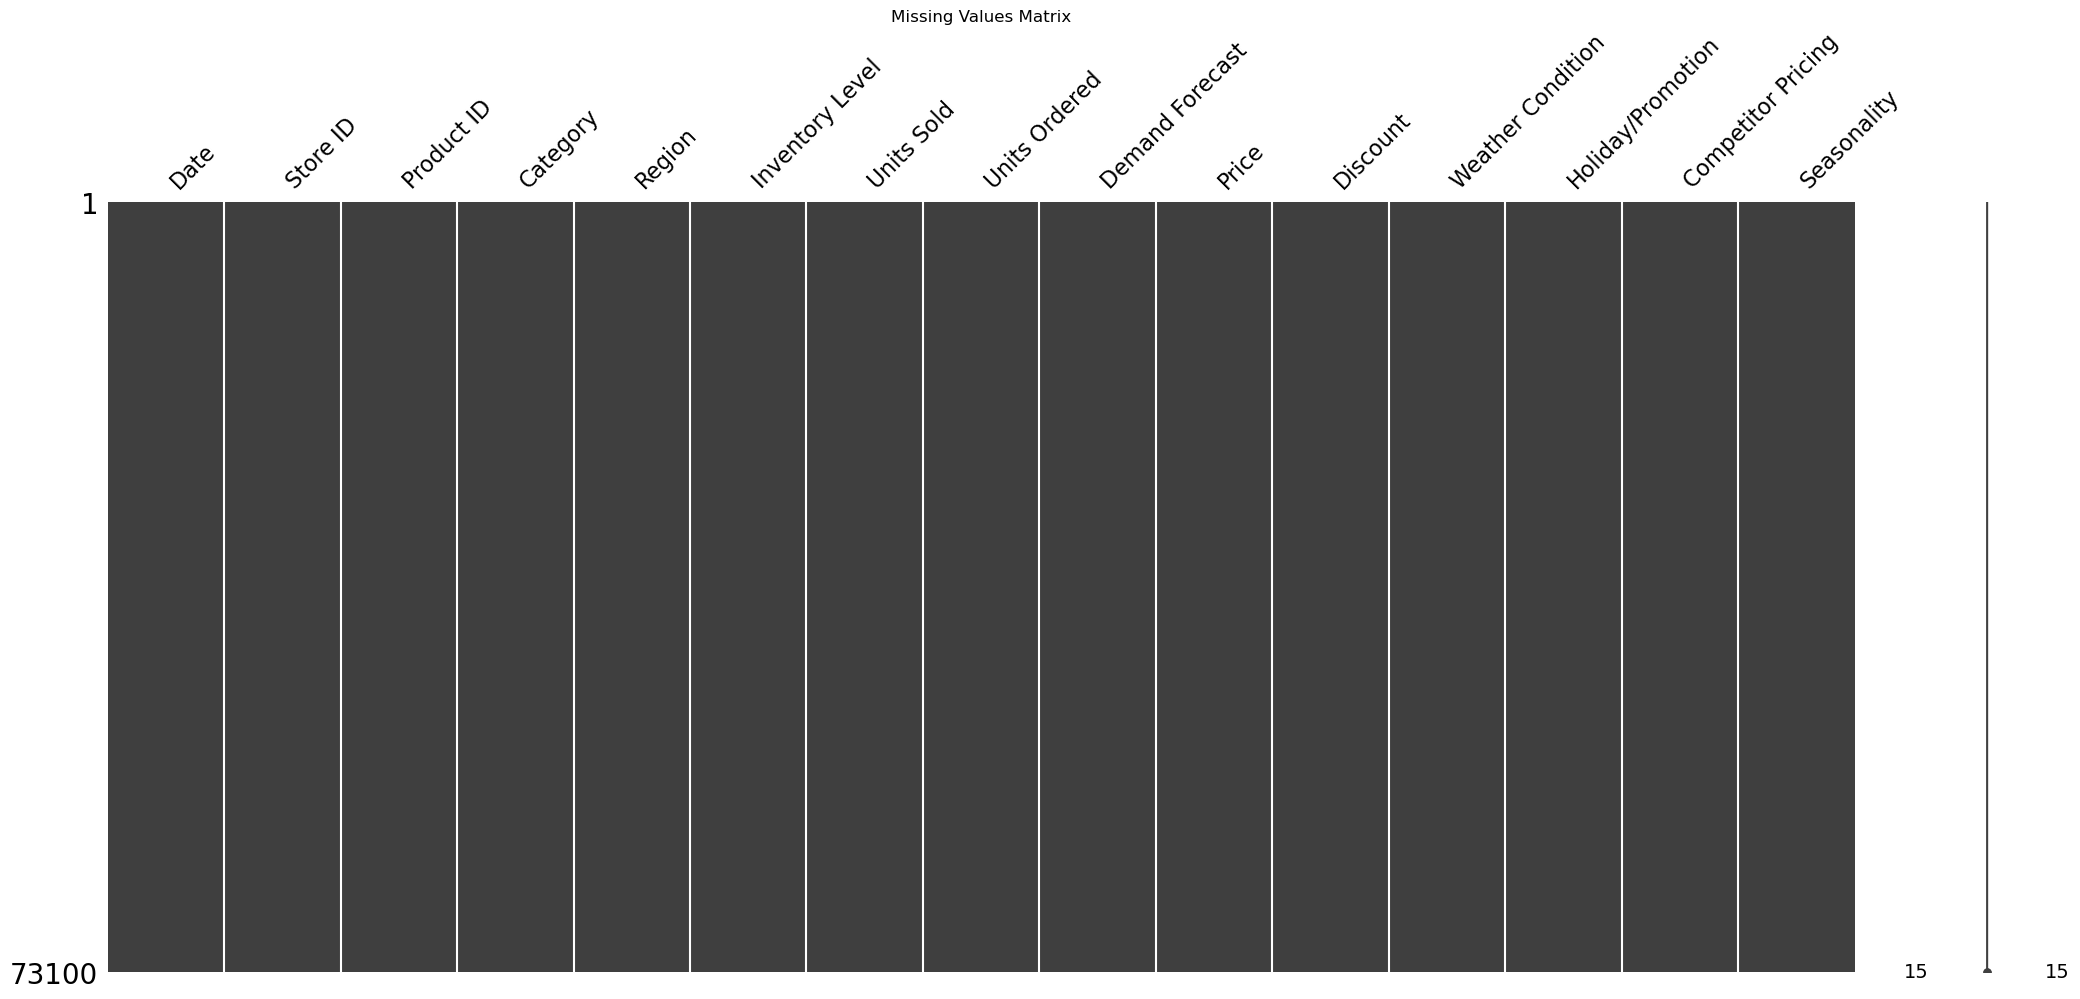


Missing Value Statistics:


Empty DataFrame
Columns: [Missing Values, Percentage]
Index: []

In [10]:
# Visualizing missing values using missingno
msno.matrix(df)
plt.title("Missing Values Matrix")
plt.show()

# Checking missing value statistics
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_data = pd.DataFrame({"Missing Values": missing_values, "Percentage": missing_percent})

# Display only columns with missing values
print("\nMissing Value Statistics:")
display(missing_data[missing_data["Missing Values"] > 0])


In [11]:
# Count missing values per column
missing_values = df.isnull().sum()

# Print only columns with missing values
print("Missing Values Count:")
print(missing_values[missing_values > 0])

Missing Values Count:
Series([], dtype: int64)


In [12]:
df.duplicated().sum()

0

## Plots on Weekly and Monthly Demand Forecast Trends

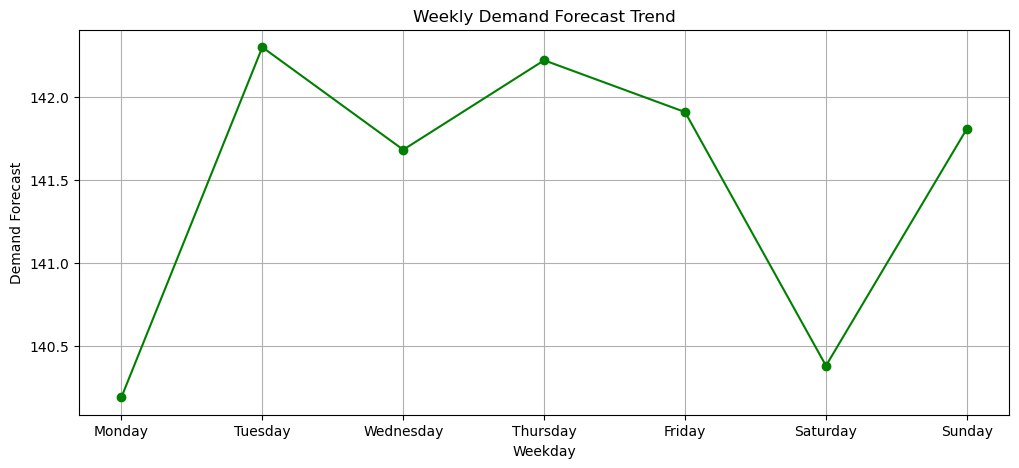

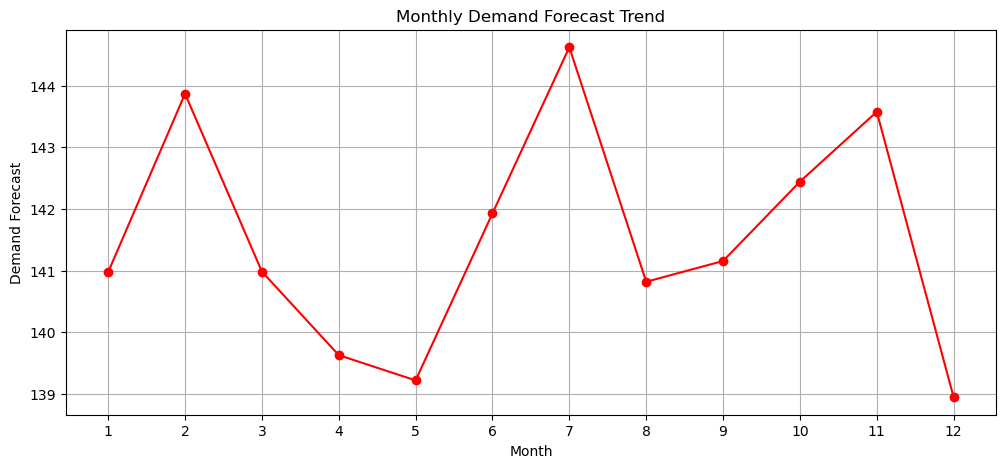

In [14]:
# Load dataset (assuming df is already loaded)
df['Date'] = pd.to_datetime(df['Date'])  # Convert to datetime
df['Weekday'] = df['Date'].dt.day_name()  # Extract Weekday name
df['Month'] = df['Date'].dt.month  # Extract Month

# Define the correct order of weekdays
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Group by Weekday and take mean demand forecast
weekday_trend = df.groupby('Weekday')['Demand Forecast'].mean().reindex(weekday_order)

# Group by Month and take mean demand forecast
monthly_trend = df.groupby('Month')['Demand Forecast'].mean()

# Line Plot: Demand Forecast vs Weekday
plt.figure(figsize=(12, 5))
plt.plot(weekday_trend.index, weekday_trend.values, marker='o', linestyle='-', color='green')
plt.xlabel('Weekday')
plt.ylabel('Demand Forecast')
plt.title('Weekly Demand Forecast Trend')
plt.grid(True)
plt.show()

# Line Plot: Demand Forecast vs Month
plt.figure(figsize=(12, 5))
plt.plot(monthly_trend.index, monthly_trend.values, marker='o', linestyle='-', color='red')
plt.xlabel('Month')
plt.ylabel('Demand Forecast')
plt.title('Monthly Demand Forecast Trend')
plt.xticks(range(1, 13))  # Set x-axis from 1 to 12 (months)
plt.grid(True)
plt.show()


In [15]:
df.head()

Date Store ID Product ID     Category Region  Inventory Level  \
0 2022-01-01     S001      P0001    Groceries  North              231   
1 2022-01-01     S001      P0002         Toys  South              204   
2 2022-01-01     S001      P0003         Toys   West              102   
3 2022-01-01     S001      P0004         Toys  North              469   
4 2022-01-01     S001      P0005  Electronics   East              166   

   Units Sold  Units Ordered  Demand Forecast  Price  Discount  \
0         127             55           135.47  33.50        20   
1         150             66           144.04  63.01        20   
2          65             51            74.02  27.99        10   
3          61            164            62.18  32.72        10   
4          14            135             9.26  73.64         0   

  Weather Condition  Holiday/Promotion  Competitor Pricing Seasonality  \
0             Rainy                  0               29.69      Autumn   
1             Sunny                  0               66.16      Autumn   
2             Sunny                  1               31.32      Summer   
3            Cloudy                  1               34.74      Autumn   
4             Sunny                  0               68.95      Summer   

    Weekday  Month  
0  Saturday      1  
1  Saturday      1  
2  Saturday      1  
3  Saturday      1  
4  Saturday      1

## Hisogram to estimate whether data is Skewed or Not

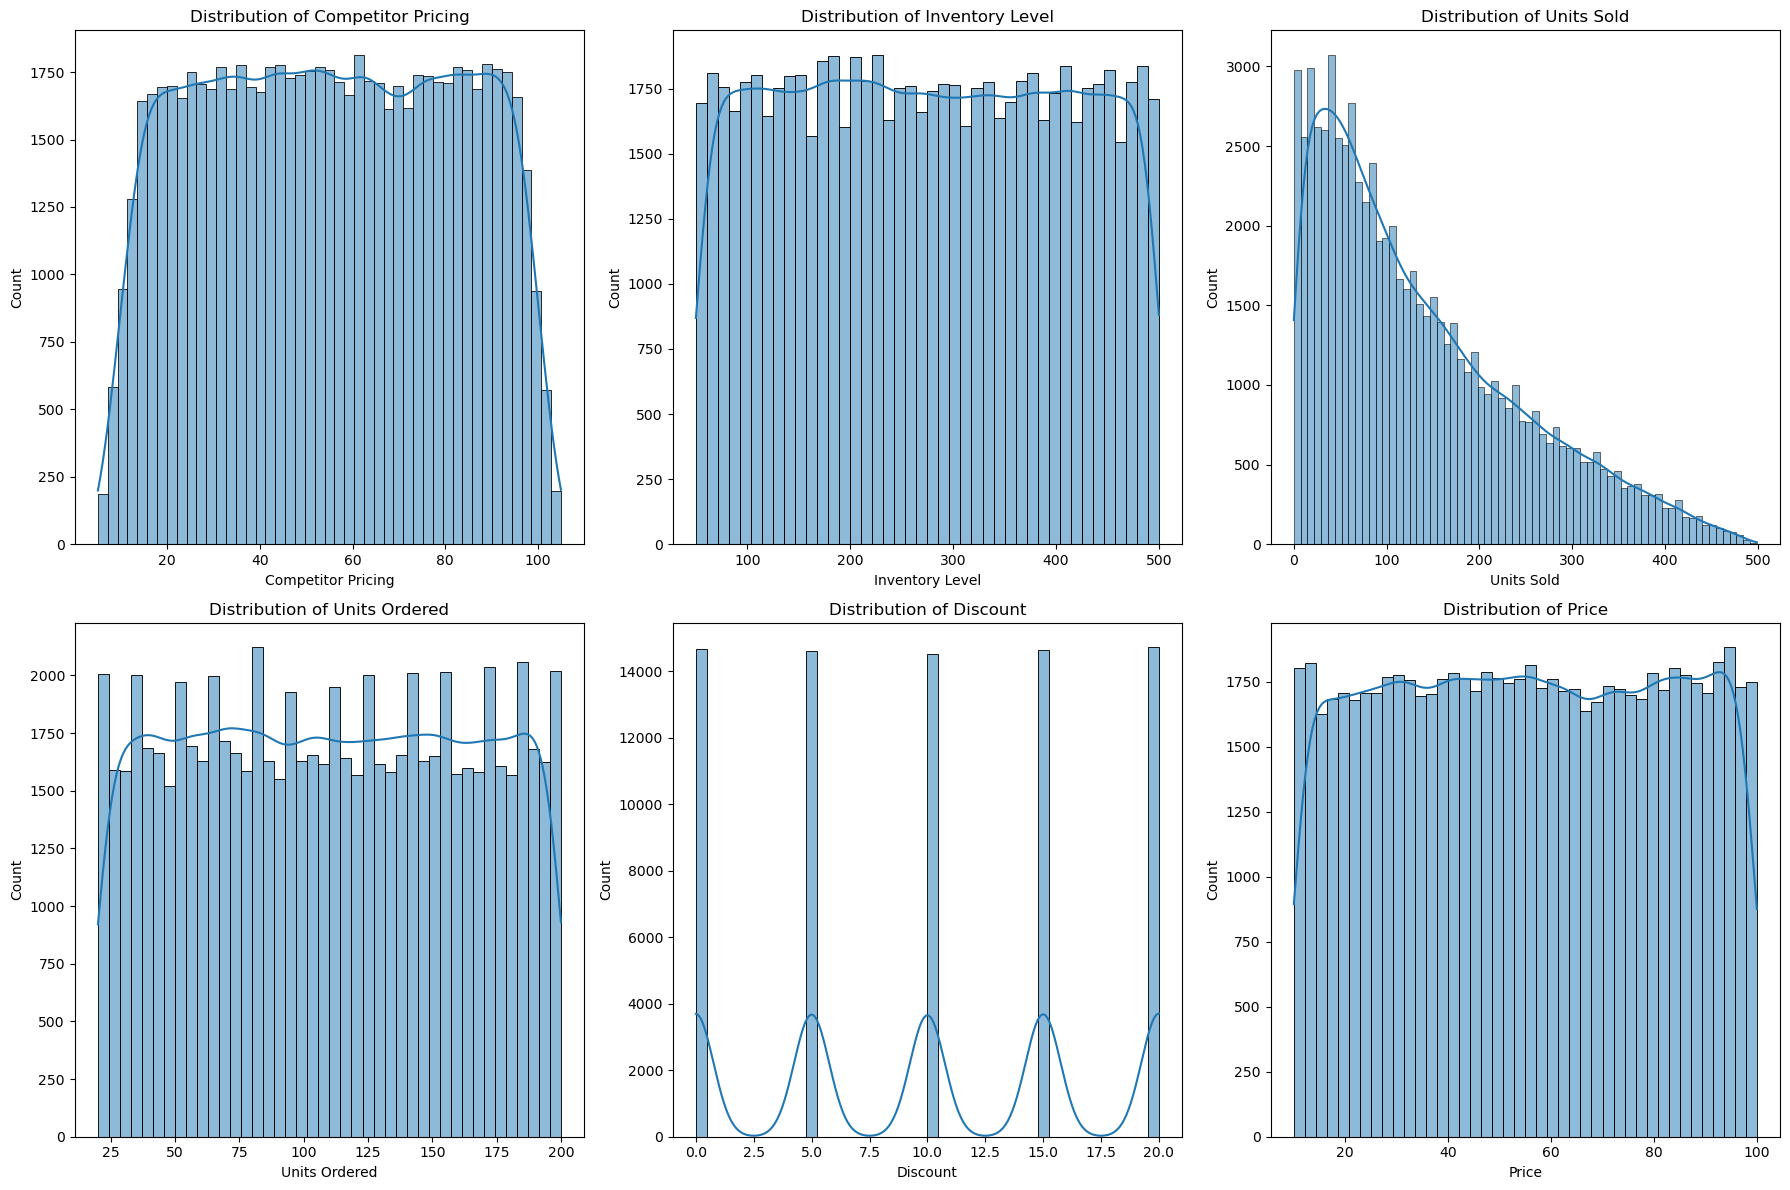

In [17]:
# Create subplots
fig, axes = plt.subplots(2,3, figsize=(18, 12))  # 2 rows, 3 columns

# Define the column names
columns = ['Competitor Pricing', 'Inventory Level', 'Units Sold', 'Units Ordered', 'Discount','Price'	]

# Plot each histogram with KDE
for ax, col in zip(axes.flat, columns):
    sns.histplot(df[col], kde=True, ax=ax)
    ax.set_title(f"Distribution of {col}")

# Adjust layout
plt.tight_layout()
plt.show()

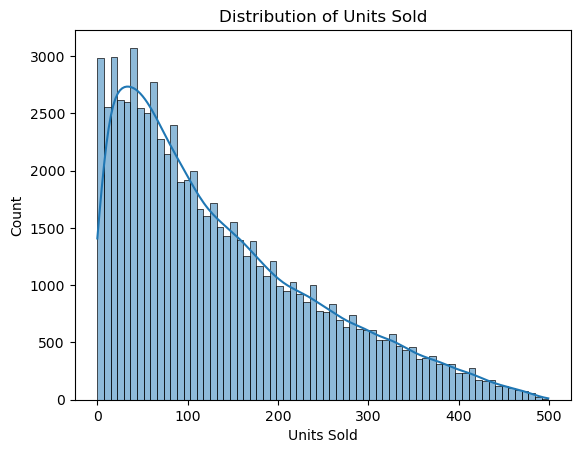

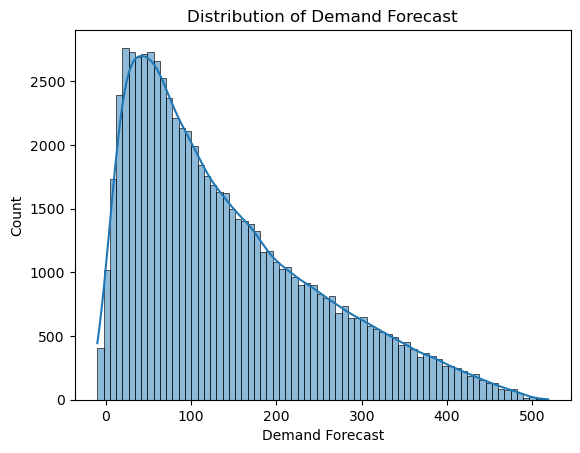

In [18]:
# Histogram with KDE (Kernel Density Estimate)-> Help To Estimate The Data Whether Skewed Or Not
sns.histplot(df['Units Sold'], kde=True)
plt.title("Distribution of Units Sold")
plt.show()
# SO It's an Right Skewed Data -> IQR can be applied
# Histogram with KDE (Kernel Density Estimate)-> Help To Estimate The Data Whether Skewed Or Not
sns.histplot(df['Demand Forecast'], kde=True)
plt.title("Distribution of Demand Forecast")
plt.show()

## Applying IQR Method to remove outliers as data is right skewed

In [20]:
print(df['Demand Forecast'].max())
print(df['Demand Forecast'].min())

518.55
-9.99


In [21]:
# Remove invalid Demand Forecast values
df = df[df['Demand Forecast'] > 0]

# Detect & Remove Outliers using IQR (Best for Right-Skewed Data)
Q1 = df['Demand Forecast'].quantile(0.25)
Q3 = df['Demand Forecast'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove extreme outliers
df = df[(df['Demand Forecast'] >= lower_bound) & (df['Demand Forecast'] <= upper_bound)]



In [22]:
print(df['Demand Forecast'].max())
print(df['Demand Forecast'].min())

440.46
0.01


In [23]:
df.shape

(71716, 17)

## Plots on Store Wise and Product Wise Demand Forecast 

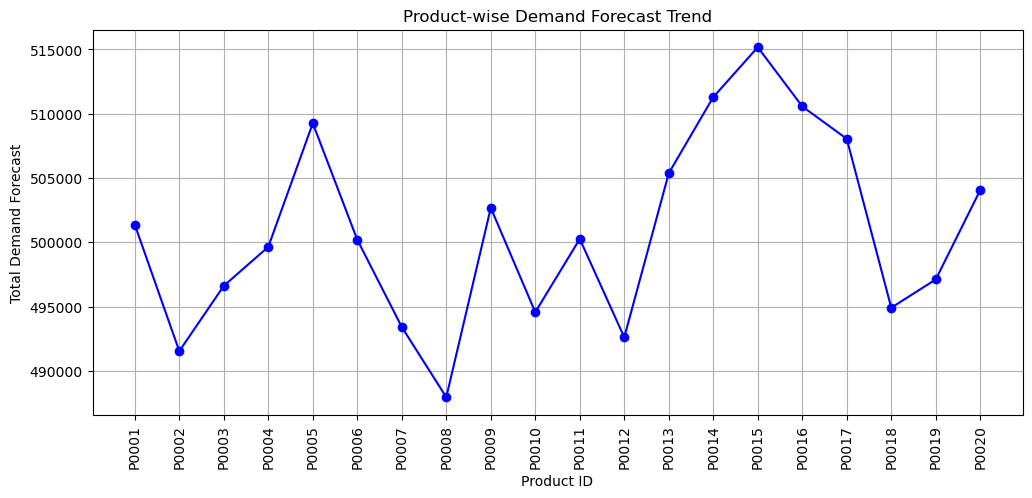

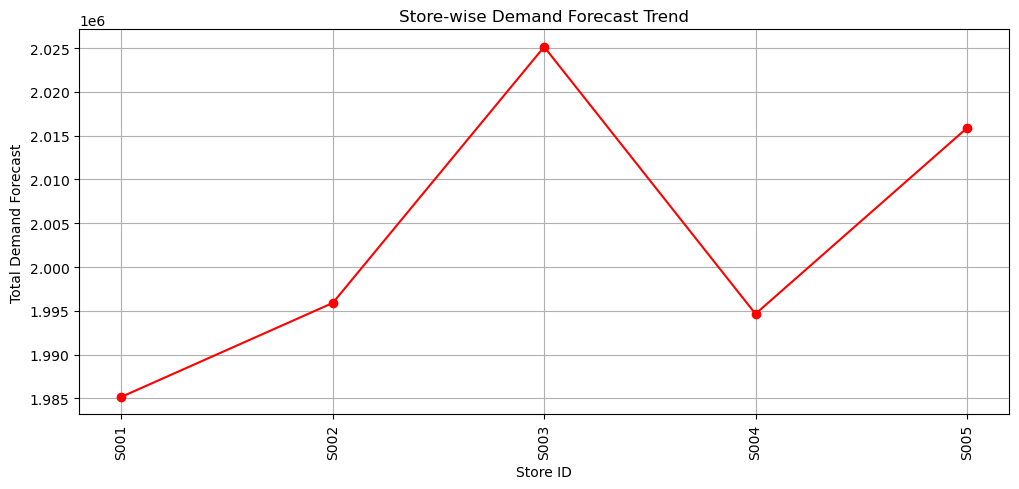

In [25]:
# Aggregate Demand Forecast by Product ID
product_trend = df.groupby('Product ID')['Demand Forecast'].sum()

# Aggregate Demand Forecast by Store ID
store_trend = df.groupby('Store ID')['Demand Forecast'].sum()

# Plot: Product-wise Demand Forecast
plt.figure(figsize=(12, 5))
plt.plot(product_trend.index, product_trend.values, marker='o', linestyle='-', color='blue')
plt.xlabel('Product ID')
plt.ylabel('Total Demand Forecast')
plt.title('Product-wise Demand Forecast Trend')
plt.xticks(rotation=90)  # Rotate for readability
plt.grid(True)
plt.show()

# Plot: Store-wise Demand Forecast
plt.figure(figsize=(12, 5))
plt.plot(store_trend.index, store_trend.values, marker='o', linestyle='-', color='red')
plt.xlabel('Store ID')
plt.ylabel('Total Demand Forecast')
plt.title('Store-wise Demand Forecast Trend')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


## Naganna Work Completed only random forest Regressor left 

## Ramesh Contribution Starts

In [28]:
df.head()

Date Store ID Product ID     Category Region  Inventory Level  \
0 2022-01-01     S001      P0001    Groceries  North              231   
1 2022-01-01     S001      P0002         Toys  South              204   
2 2022-01-01     S001      P0003         Toys   West              102   
3 2022-01-01     S001      P0004         Toys  North              469   
4 2022-01-01     S001      P0005  Electronics   East              166   

   Units Sold  Units Ordered  Demand Forecast  Price  Discount  \
0         127             55           135.47  33.50        20   
1         150             66           144.04  63.01        20   
2          65             51            74.02  27.99        10   
3          61            164            62.18  32.72        10   
4          14            135             9.26  73.64         0   

  Weather Condition  Holiday/Promotion  Competitor Pricing Seasonality  \
0             Rainy                  0               29.69      Autumn   
1             Sunny                  0               66.16      Autumn   
2             Sunny                  1               31.32      Summer   
3            Cloudy                  1               34.74      Autumn   
4             Sunny                  0               68.95      Summer   

    Weekday  Month  
0  Saturday      1  
1  Saturday      1  
2  Saturday      1  
3  Saturday      1  
4  Saturday      1

## Plot of Count of Sales by Month

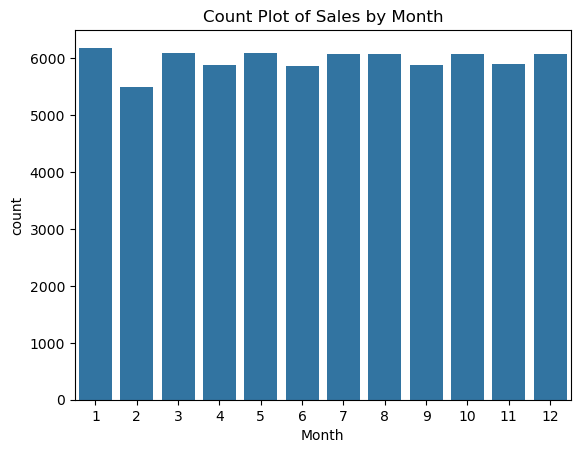

In [30]:
sns.countplot(x='Month', data=df)
plt.title("Count Plot of Sales by Month")
plt.show()


## Scatter plot of Numerical values , Boxplot and Violin Plots Month Wise

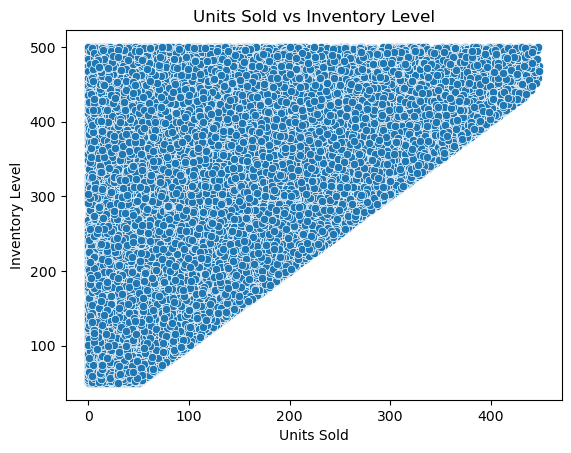

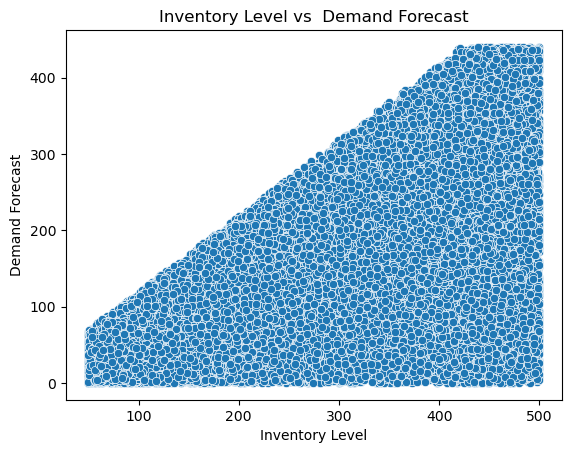

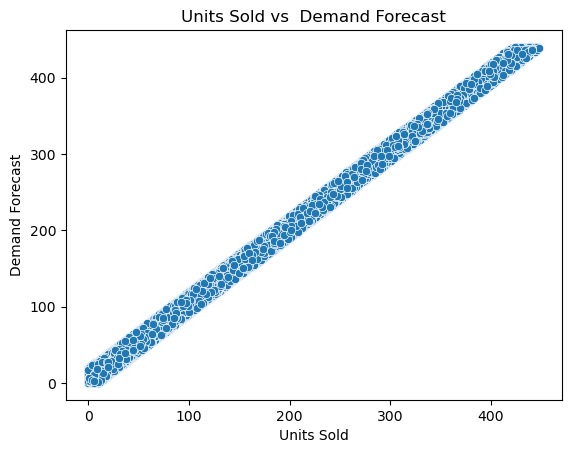

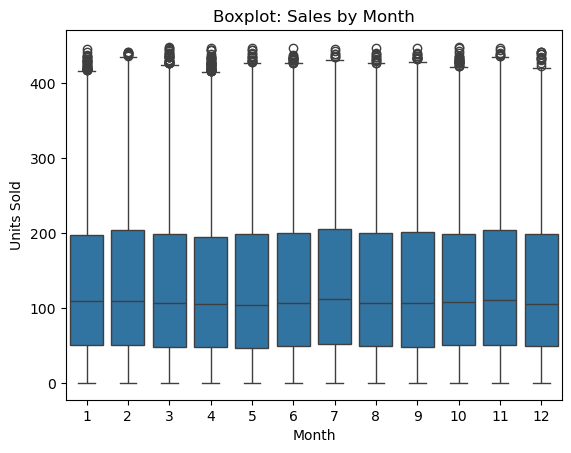

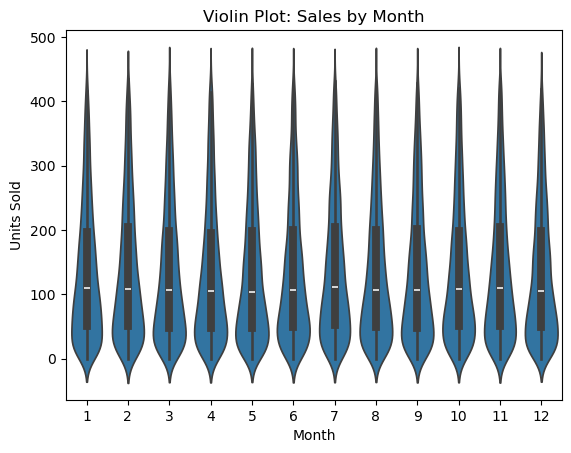

In [32]:
# Scatter plot for numerical relationships
sns.scatterplot(x='Units Sold', y='Inventory Level', data=df)
plt.title("Units Sold vs Inventory Level")
plt.show()
# Scatter plot for numerical relationships
sns.scatterplot(x='Inventory Level', y='Demand Forecast', data=df)
plt.title("Inventory Level vs  Demand Forecast")
plt.show()
# Scatter plot for numerical relationships
sns.scatterplot(x='Units Sold', y='Demand Forecast', data=df)
plt.title("Units Sold vs  Demand Forecast")
plt.show()
# Boxplot for sales by Month
sns.boxplot(x='Month', y='Units Sold', data=df)
plt.title("Boxplot: Sales by Month")
plt.show()

# Violin Plot: Units Sold by Month
sns.violinplot(x='Month', y='Units Sold', data=df)
plt.title("Violin Plot: Sales by Month")
plt.show()


## Checking the Corealtion Heatmap 

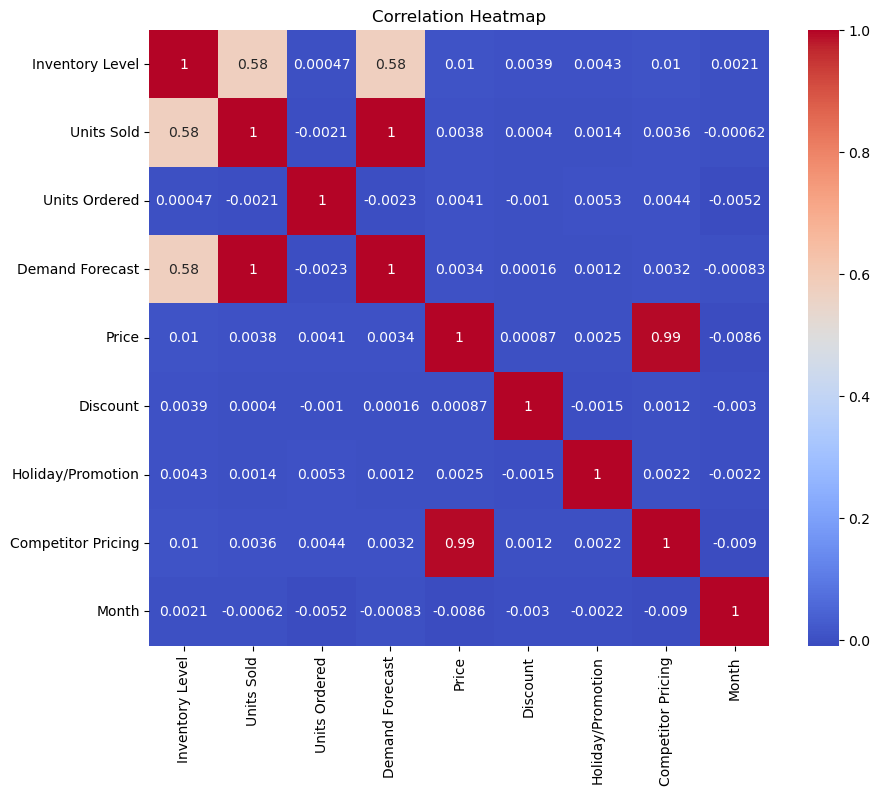

In [34]:
numeric_data = df.select_dtypes(include=['number'])  # Select only numeric columns
corr = numeric_data.corr()  # Compute correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

## Boxplot of Inventory Level

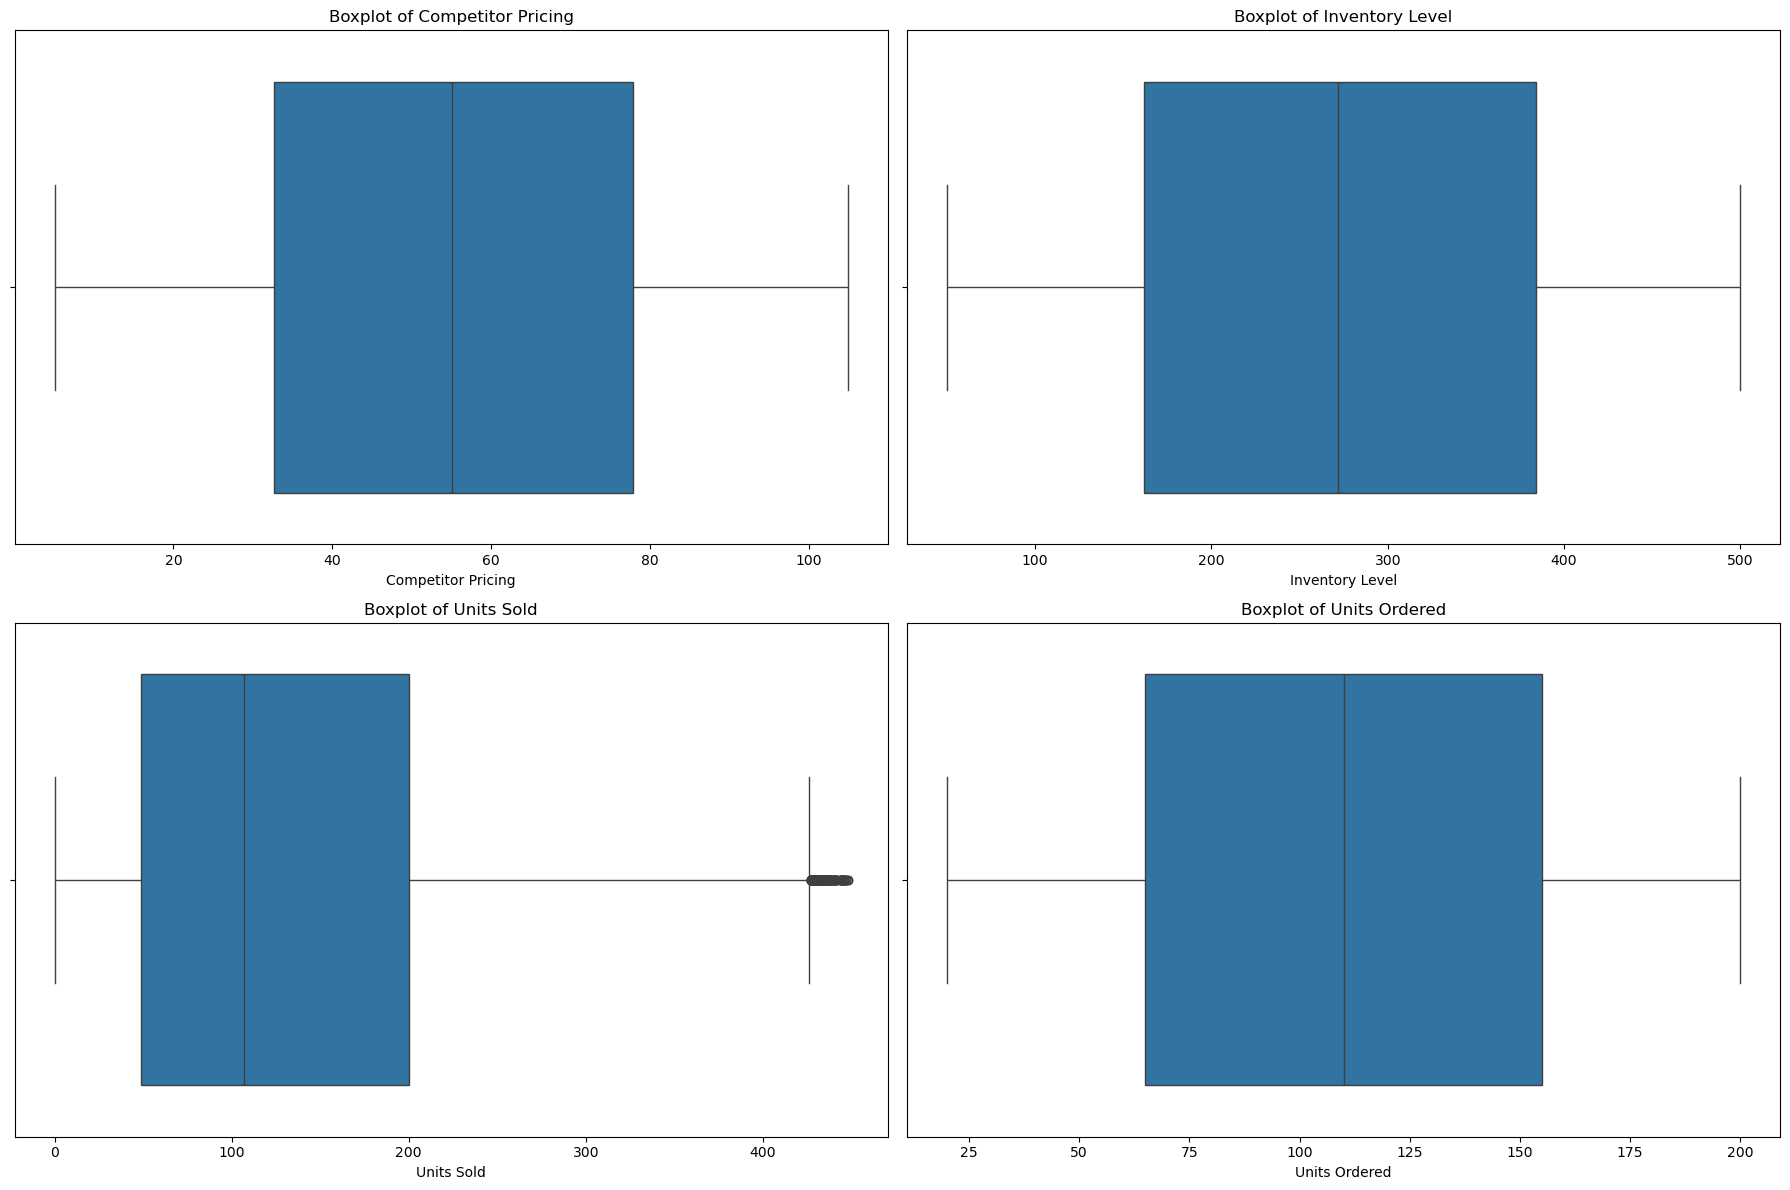

In [36]:
fig, axes = plt.subplots(2, 2, figsize=(18, 12))  # 2 rows, 3 columns

# Define the column names
columns = ['Competitor Pricing', 'Inventory Level', 'Units Sold', 'Units Ordered']

# Plot each boxplot
for ax, col in zip(axes.flat, columns):
    sns.boxplot(x=df[col], ax=ax)
    ax.set_title(f"Boxplot of {col}")

# Adjust layout
plt.tight_layout()
plt.show()

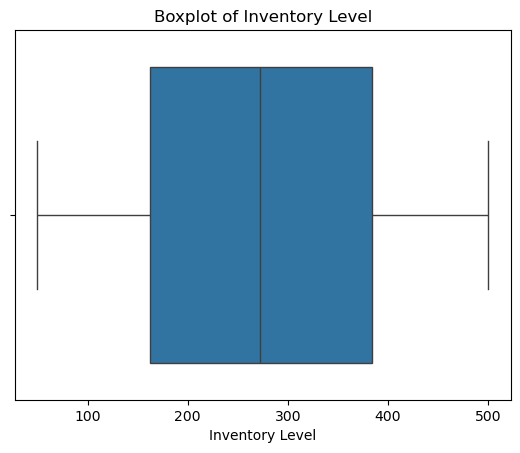

In [37]:
# Boxplot to detect outliers in numerical columns
sns.boxplot(x=df['Inventory Level'])
plt.title("Boxplot of Inventory Level")
plt.show()

## Data Analysis Plots of Units Sold Over time with Seasonal Components , Residuals and Original Time Series. 

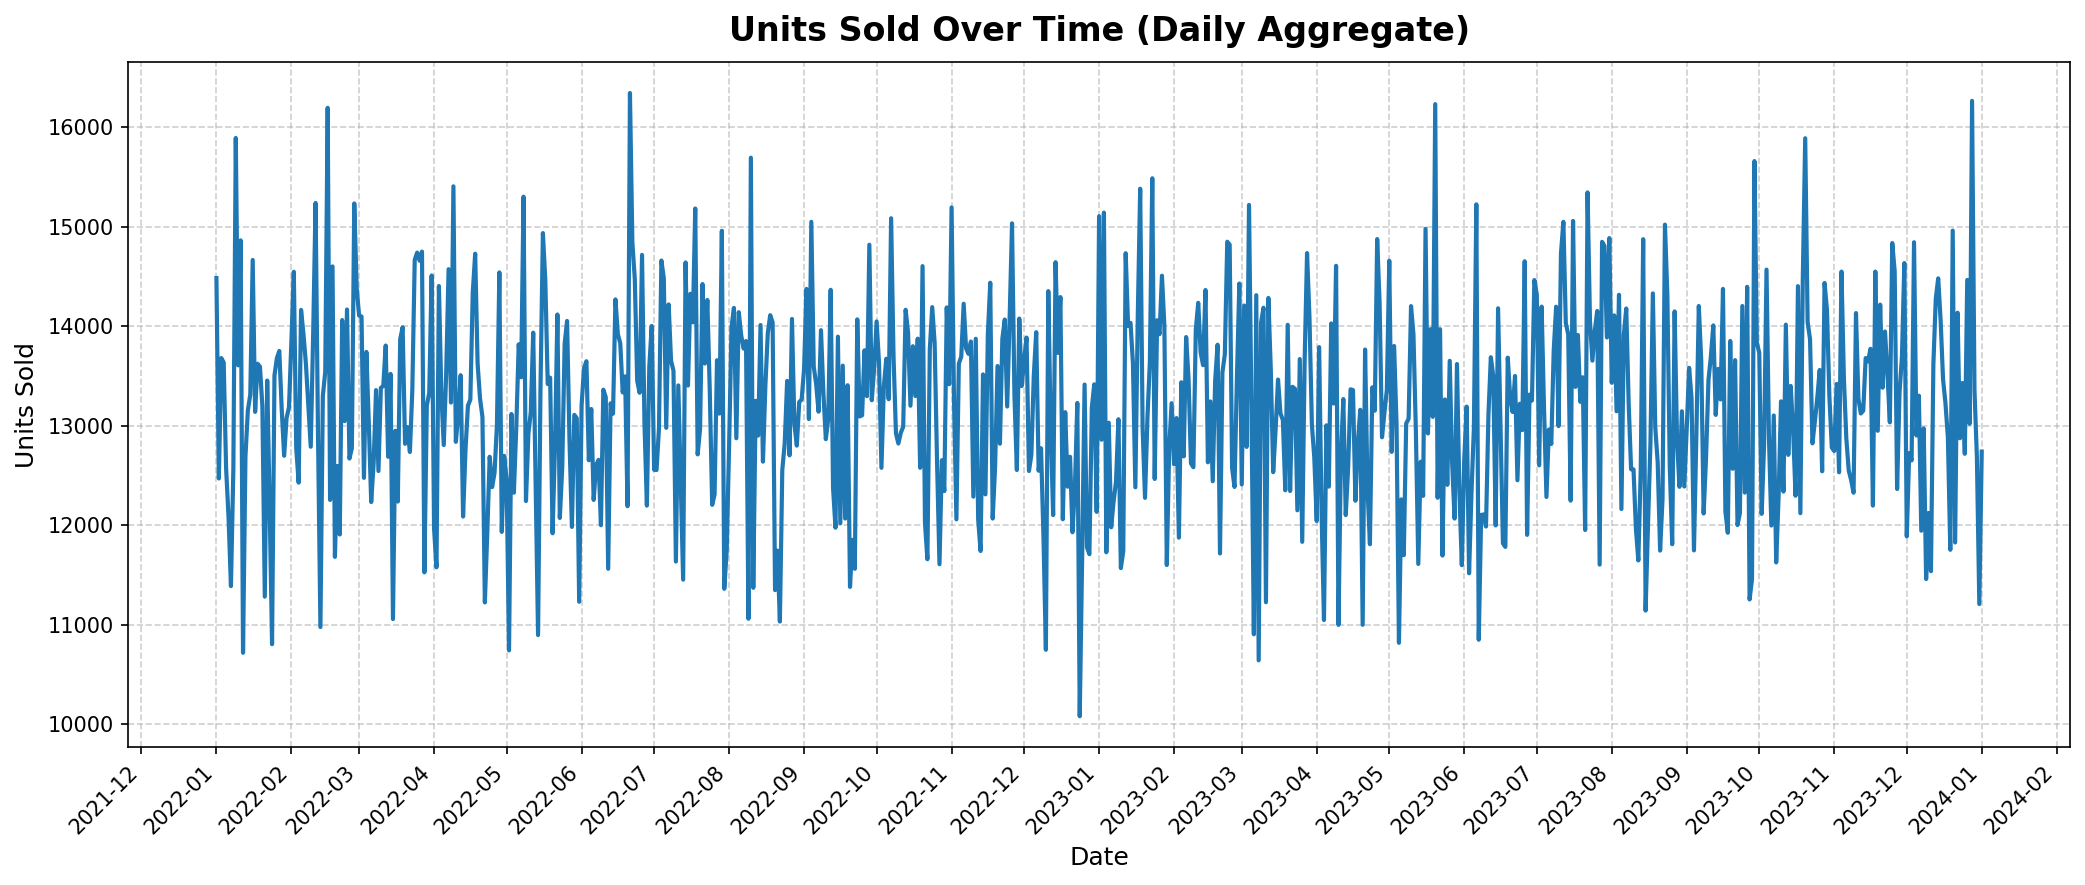

Skipping Yearly period 366: x must have 2 complete cycles requires 732 observations. x only has 731 observation(s)
Skipping Yearly period 367: x must have 2 complete cycles requires 734 observations. x only has 731 observation(s)
Skipping Yearly period 368: x must have 2 complete cycles requires 736 observations. x only has 731 observation(s)
Skipping Yearly period 369: x must have 2 complete cycles requires 738 observations. x only has 731 observation(s)

Top periods with strongest seasonality (based on variance):
Weekly - Period 9: Variance = 24743.87
Monthly - Period 33: Variance = 53012.08
Bi-Monthly - Period 58: Variance = 95428.27
Yearly - Period 365: Variance = 1015063.57


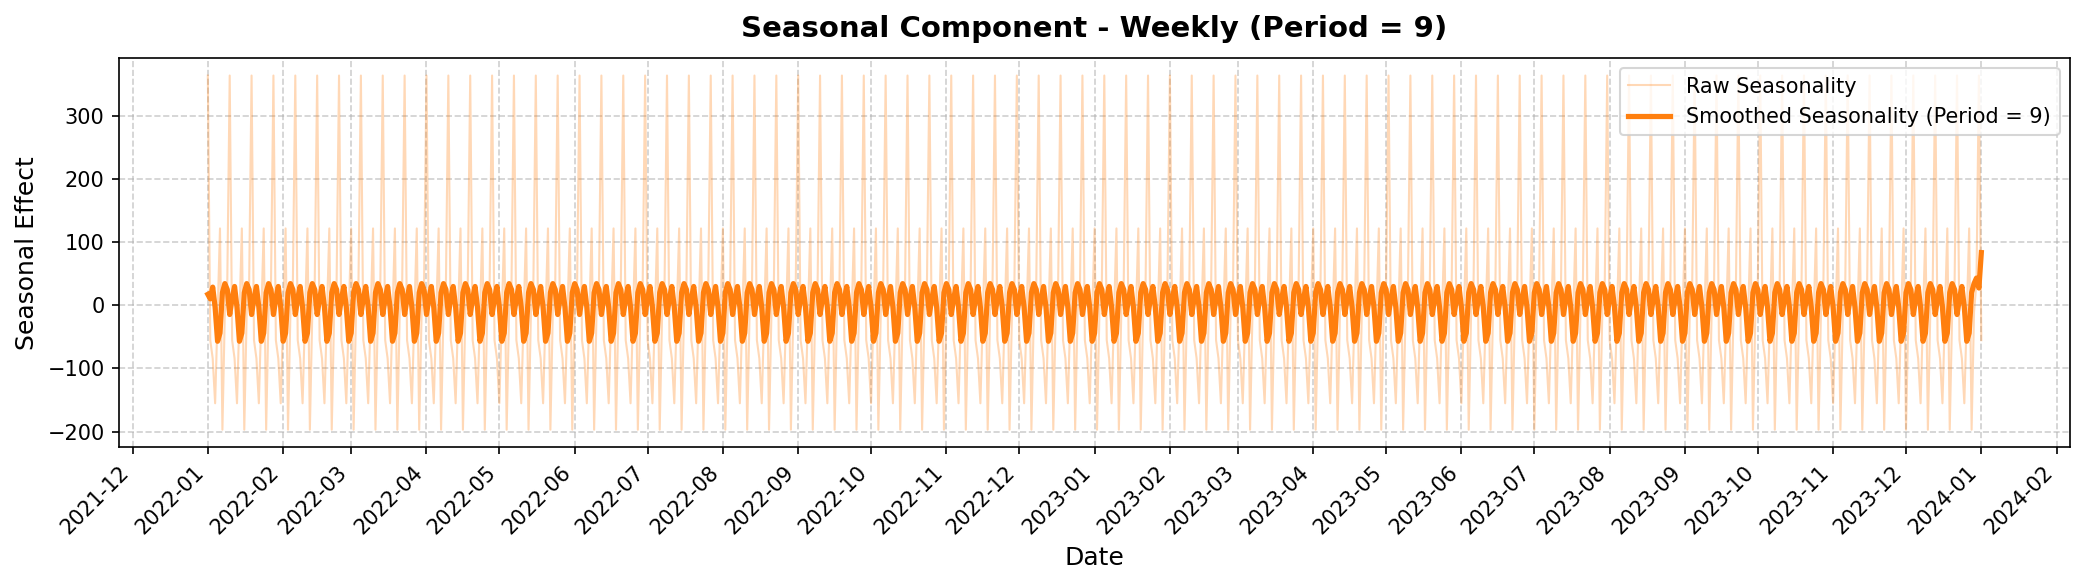

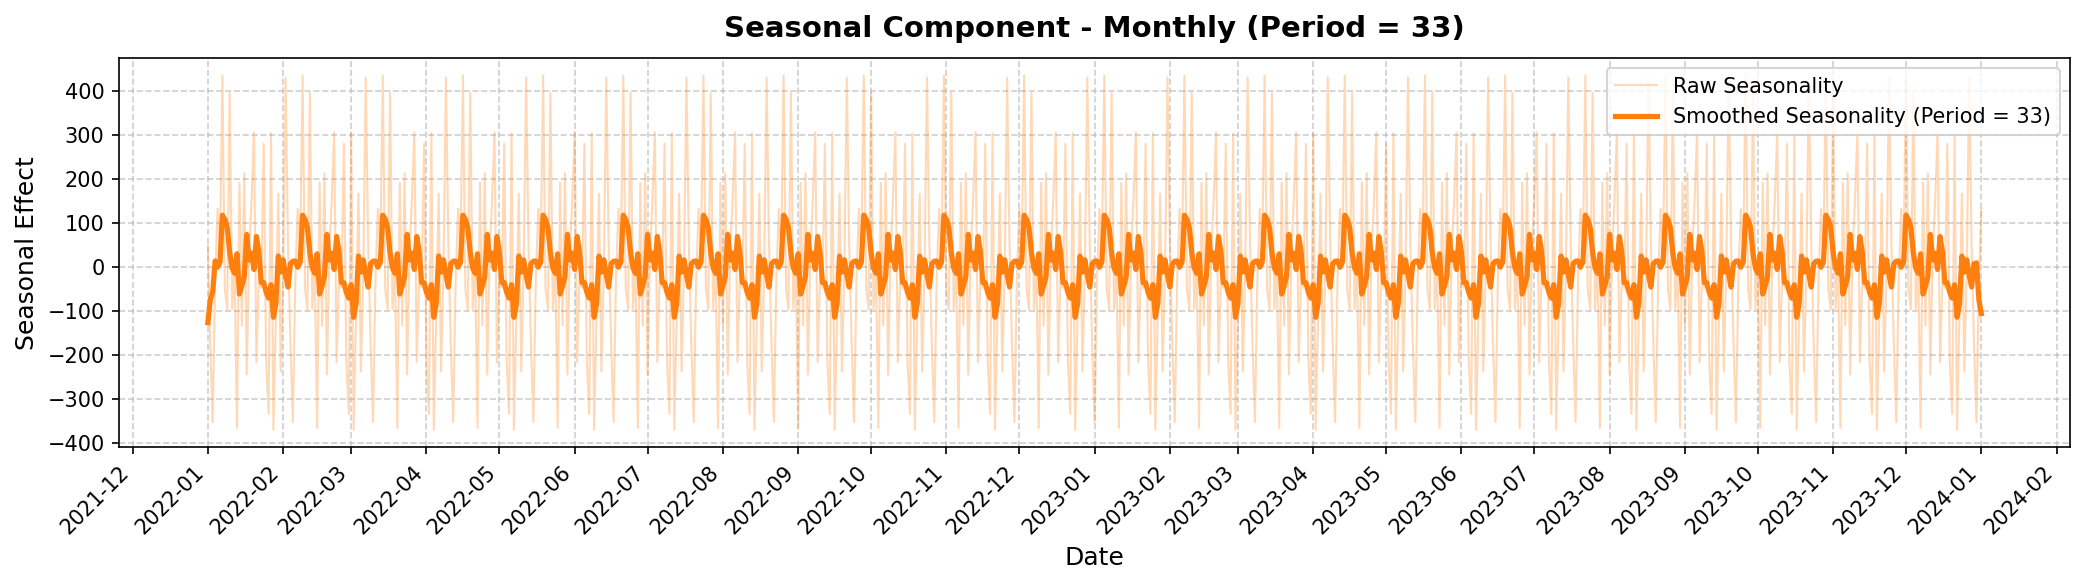

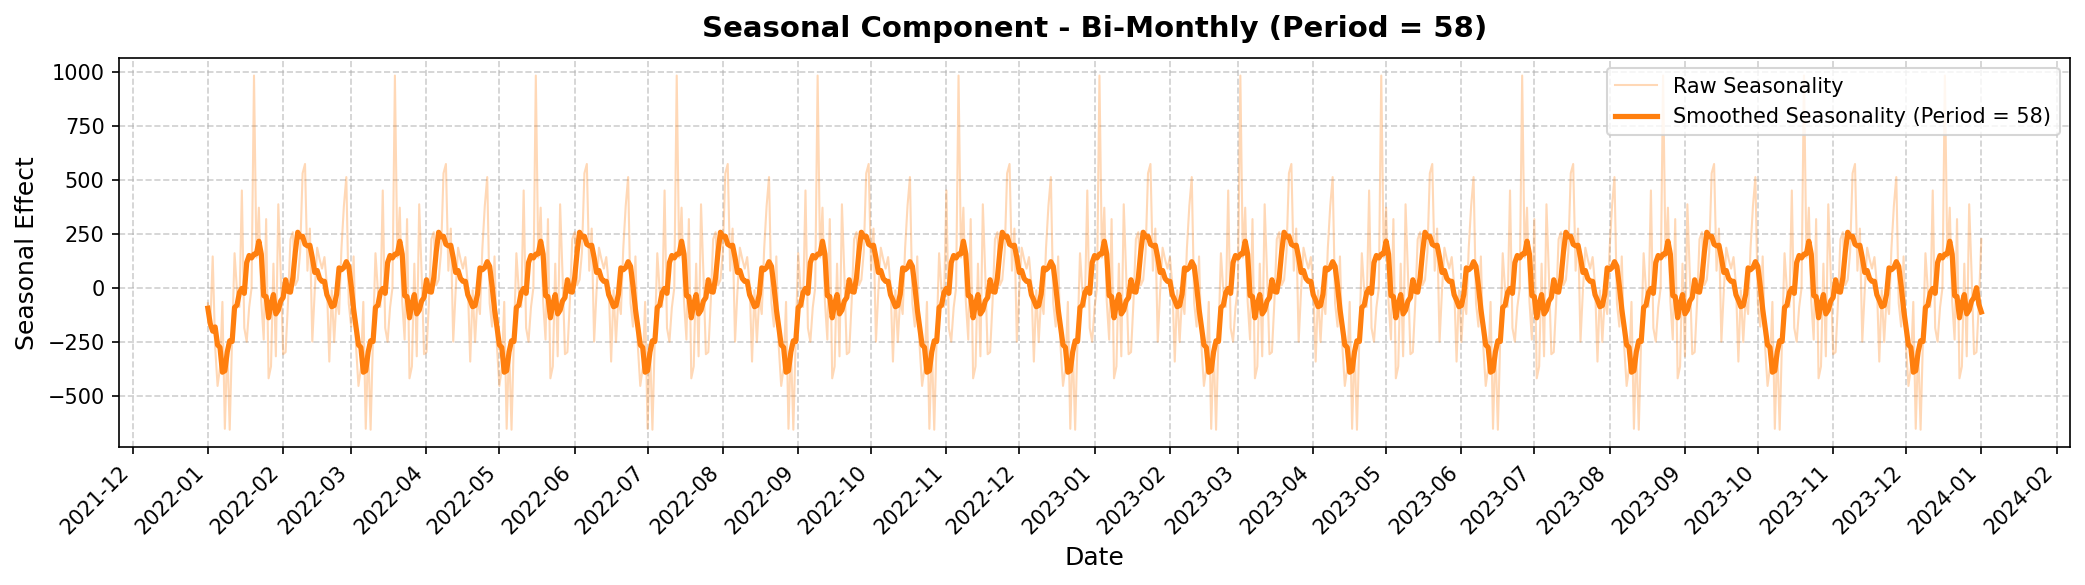

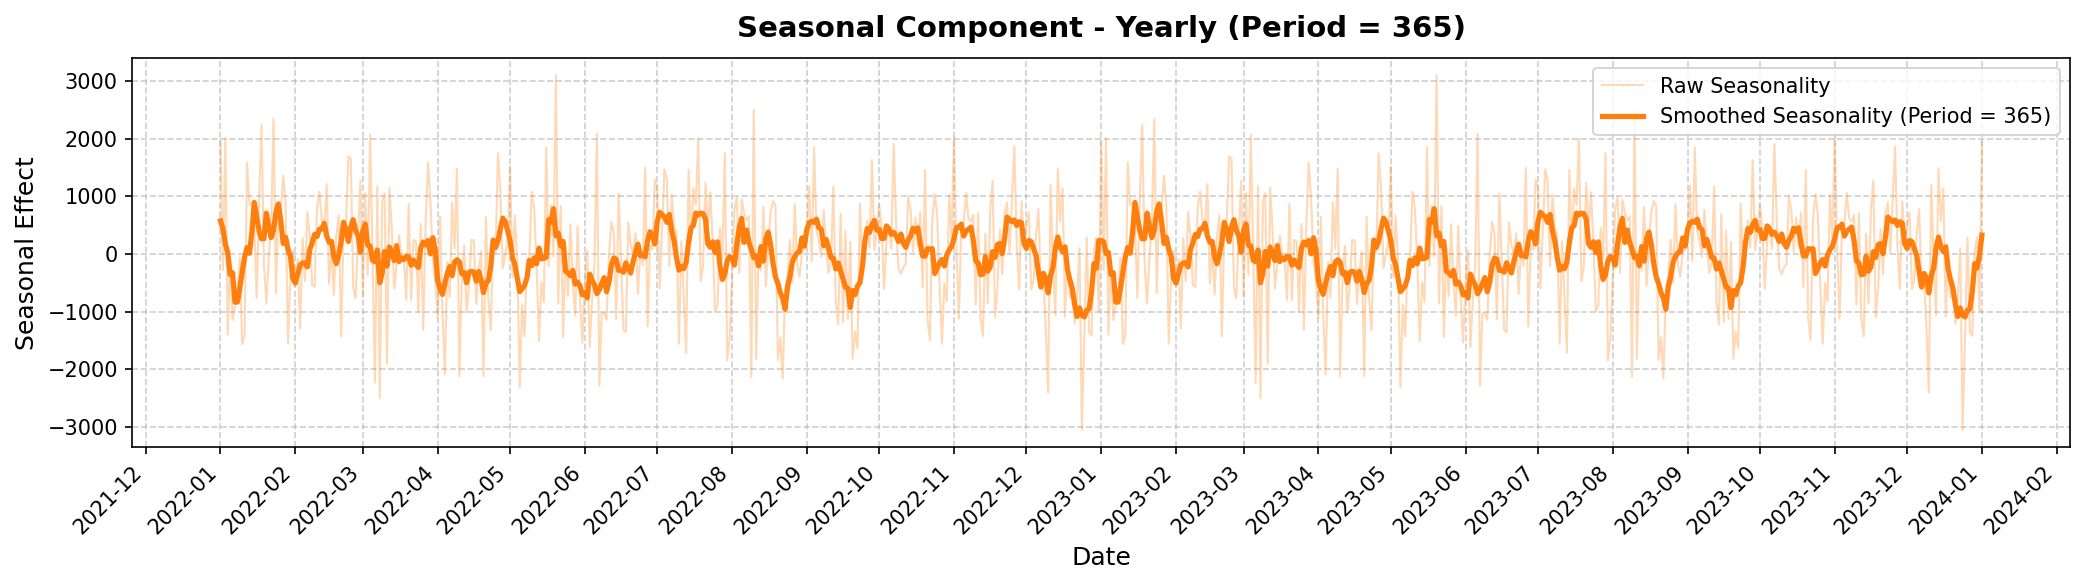

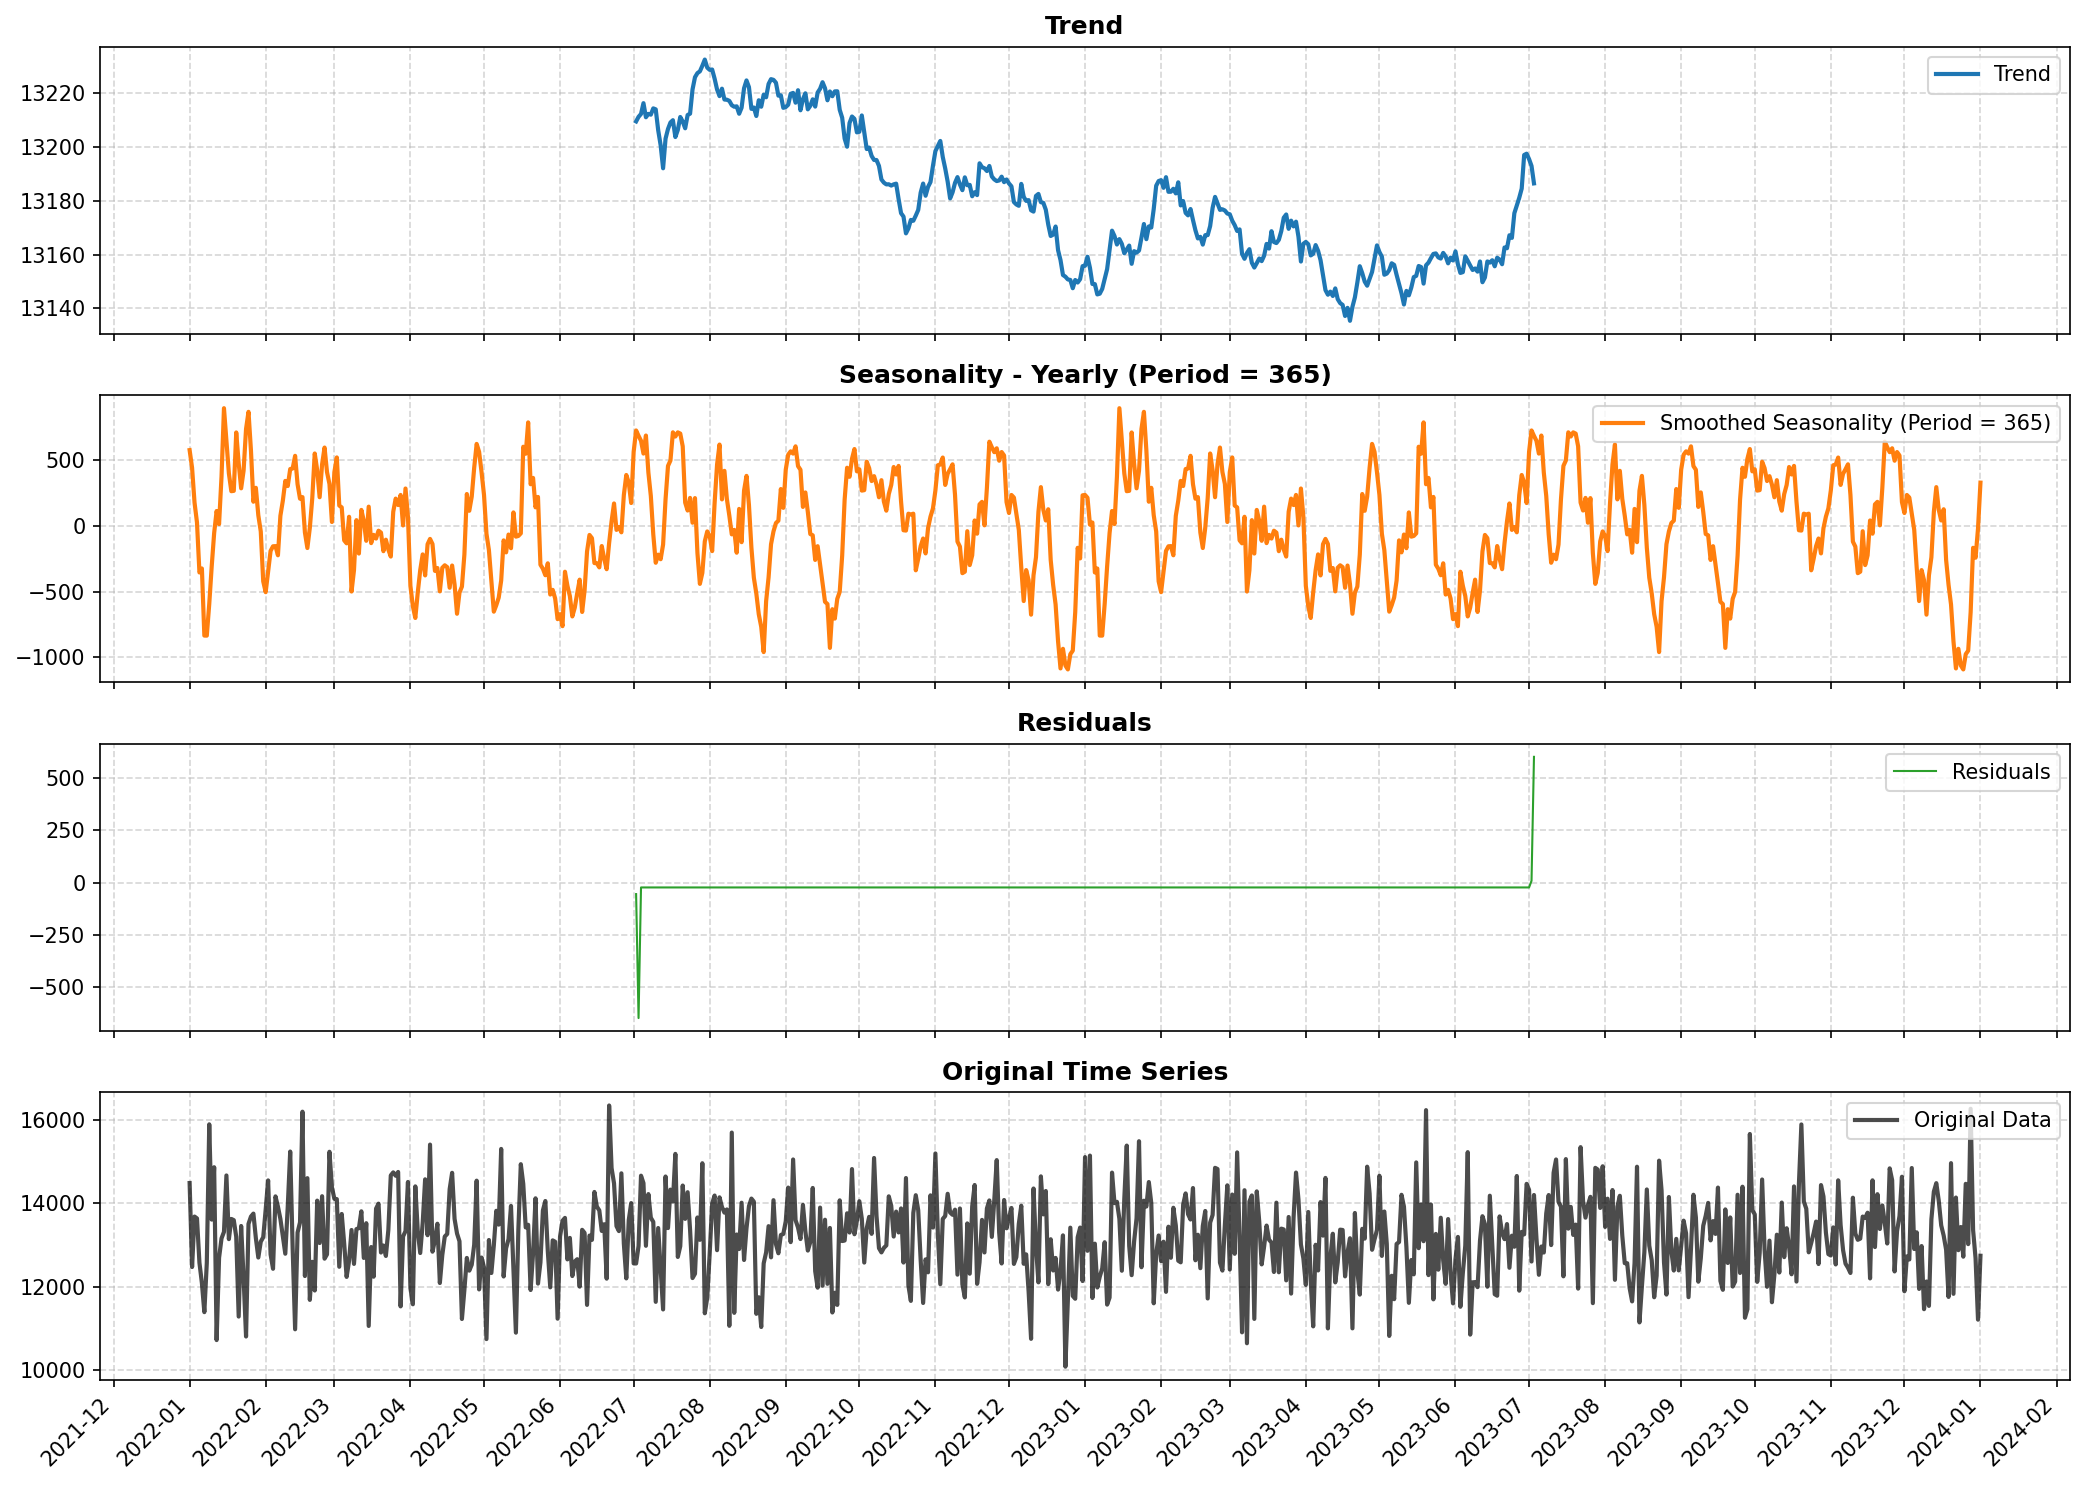

In [39]:
# Ensure correct column names
df.columns = df.columns.str.strip()  # Remove leading/trailing spaces

# Check if 'Date' exists in the dataset
if 'Date' not in df.columns:
    raise KeyError("Column 'Date' not found in the dataset. Available columns: ", df.columns)

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Drop rows where 'Date' is NaT (invalid dates)
df = df.dropna(subset=['Date'])

# Check if 'Units Sold' exists and handle missing values
if 'Units Sold' not in df.columns:
    raise KeyError("Column 'Units Sold' not found in the dataset.")
df['Units Sold'] = pd.to_numeric(df['Units Sold'], errors='coerce').fillna(0)  # Convert to numeric, fill NaNs with 0

# Aggregate data by date (sum Units Sold across all stores/products per day)
df_daily = df.groupby('Date')['Units Sold'].sum().reset_index()
df_daily.set_index('Date', inplace=True)

# Plot original time series
plt.figure(figsize=(14, 6), dpi=150)
sns.lineplot(x=df_daily.index, y='Units Sold', data=df_daily, linewidth=2, color="tab:blue")
plt.title("Units Sold Over Time (Daily Aggregate)", fontsize=16, fontweight="bold", pad=10)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Units Sold", fontsize=12)
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Define refined period ranges around key cycles
period_ranges = {
    "Weekly": range(5, 10, 1),        # 5 to 9 days (weekly refinement)
    "Monthly": range(25, 35, 1),      # 25 to 34 days (monthly refinement)
    "Bi-Monthly": range(55, 65, 1),   # 55 to 64 days (bi-monthly refinement)
    "Yearly": range(360, 370, 1)      # 360 to 369 days (yearly refinement)
}

# Store seasonal strengths
seasonal_strengths = {}

# Test each period and compute variance of seasonal component
for range_name, periods in period_ranges.items():
    for period in periods:
        try:
            decomposition = seasonal_decompose(df_daily['Units Sold'], model='additive', period=period)
            seasonal_variance = np.var(decomposition.seasonal)
            seasonal_strengths[(range_name, period)] = seasonal_variance
        except ValueError as e:
            print(f"Skipping {range_name} period {period}: {e}")
            continue

# Find the top period from each range
top_periods = {}
for range_name in period_ranges.keys():
    range_strengths = {k[1]: v for k, v in seasonal_strengths.items() if k[0] == range_name}
    if range_strengths:
        best_period = max(range_strengths.items(), key=lambda x: x[1])
        top_periods[range_name] = best_period

print("\nTop periods with strongest seasonality (based on variance):")
for range_name, (period, variance) in top_periods.items():
    print(f"{range_name} - Period {period}: Variance = {variance:.2f}")

# Plot refined seasonal components for top periods
for range_name, (period, _) in top_periods.items():
    decomposition = seasonal_decompose(df_daily['Units Sold'], model='additive', period=period)
    seasonal_smoothed = decomposition.seasonal.rolling(window=7, center=True, min_periods=1).mean()

    plt.figure(figsize=(14, 4), dpi=150)
    plt.plot(decomposition.seasonal, color='tab:orange', alpha=0.3, linewidth=1, label="Raw Seasonality")
    plt.plot(seasonal_smoothed, color='tab:orange', linewidth=2.5, label=f"Smoothed Seasonality (Period = {period})")
    plt.title(f"Seasonal Component - {range_name} (Period = {period})", fontsize=14, fontweight="bold", pad=10)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Seasonal Effect", fontsize=12)
    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend(loc='upper right', fontsize=10)
    plt.tight_layout()
    plt.show()

# Full decomposition for the "best" period (highest variance across all ranges)
if top_periods:
    best_range, (best_period, _) = max(top_periods.items(), key=lambda x: x[1][1])
    decomposition = seasonal_decompose(df_daily['Units Sold'], model='additive', period=best_period)
    seasonal_smoothed = decomposition.seasonal.rolling(window=7, center=True, min_periods=1).mean()

    fig, axes = plt.subplots(4, 1, figsize=(14, 10), dpi=150, sharex=True)
    axes[0].plot(decomposition.trend, label="Trend", color='tab:blue', linewidth=2)
    axes[0].set_title("Trend", fontsize=12, fontweight="bold")
    axes[1].plot(seasonal_smoothed, label=f"Smoothed Seasonality (Period = {best_period})", color='tab:orange', linewidth=2)
    axes[1].set_title(f"Seasonality - {best_range} (Period = {best_period})", fontsize=12, fontweight="bold")
    axes[2].plot(decomposition.resid, label="Residuals", color='tab:green', linewidth=1)
    axes[2].set_title("Residuals", fontsize=12, fontweight="bold")
    axes[3].plot(df_daily['Units Sold'], label="Original Data", color='black', alpha=0.7, linewidth=2)
    axes[3].set_title("Original Time Series", fontsize=12, fontweight="bold")

    for ax in axes:
        ax.grid(True, linestyle='--', alpha=0.5)
        ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
        ax.legend(loc='upper right', fontsize=10)

    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("No valid seasonality detected.")


## Siva Surya Work Starts

## Added New Columns Named Sales Velocity, Effective price , COmpetitive price gap to make model depend on multiple features and avoid overfitting.

In [42]:
# Debug: Check existing columns
print("Before Adding Columns:", df.columns)

# Convert necessary columns to numeric
df["Price"] = pd.to_numeric(df["Price"], errors="coerce").fillna(0)
df["Discount"] = pd.to_numeric(df["Discount"], errors="coerce").fillna(0)
df["Competitor Pricing"] = pd.to_numeric(df["Competitor Pricing"], errors="coerce").fillna(0)

# Add computed columns
df["Sales Velocity"] = df["Units Sold"] / (df["Inventory Level"] + 1)  # Avoid division by zero
df["Effective Price"] = df["Price"] * (1 - df["Discount"] / 100)
df["Competitive Price Gap"] = df["Competitor Pricing"] - df["Effective Price"]

# Debug: Check if new columns exist
print("\nAfter Adding Columns:", df.columns)

# Display first 5 rows to verify
print("\nFirst 5 Rows of New Columns:")
print(df[["Sales Velocity", "Effective Price", "Competitive Price Gap"]].head())


Before Adding Columns: Index(['Date', 'Store ID', 'Product ID', 'Category', 'Region',
       'Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast',
       'Price', 'Discount', 'Weather Condition', 'Holiday/Promotion',
       'Competitor Pricing', 'Seasonality', 'Weekday', 'Month'],
      dtype='object')

After Adding Columns: Index(['Date', 'Store ID', 'Product ID', 'Category', 'Region',
       'Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast',
       'Price', 'Discount', 'Weather Condition', 'Holiday/Promotion',
       'Competitor Pricing', 'Seasonality', 'Weekday', 'Month',
       'Sales Velocity', 'Effective Price', 'Competitive Price Gap'],
      dtype='object')

First 5 Rows of New Columns:
   Sales Velocity  Effective Price  Competitive Price Gap
0        0.547414           26.800                  2.890
1        0.731707           50.408                 15.752
2        0.631068           25.191                  6.129
3        0.129787           29.

In [43]:
# Select relevant columns
summary_df = df[["Sales Velocity", "Effective Price", "Competitive Price Gap"]].describe().T

# Display as a formatted table by Using tabulate 
print("\n Summary Statistics of Computed Columns:")
print(tabulate(summary_df, headers="keys", tablefmt="grid"))



 Summary Statistics of Computed Columns:
+-----------------------+---------+-----------+-----------+--------+----------+-----------+-----------+-----------+
|                       |   count |      mean |       std |    min |      25% |       50% |       75% |       max |
+=======================+=========+===========+===========+========+==========+===========+===========+===========+
| Sales Velocity        |   71716 |  0.495375 |  0.283889 |  0     |  0.25    |  0.492754 |  0.739704 |  0.997696 |
+-----------------------+---------+-----------+-----------+--------+----------+-----------+-----------+-----------+
| Effective Price       |   71716 | 49.6313   | 23.8114   |  8.008 | 29.214   | 49.212    | 69.6405   | 99.98     |
+-----------------------+---------+-----------+-----------+--------+----------+-----------+-----------+-----------+
| Competitive Price Gap |   71716 |  5.53168  |  5.83282  | -5     |  1.19987 |  4.708    |  9.1655   | 24.972    |
+-----------------------+-----

## All 3 new columns Distribution Plot by count wise

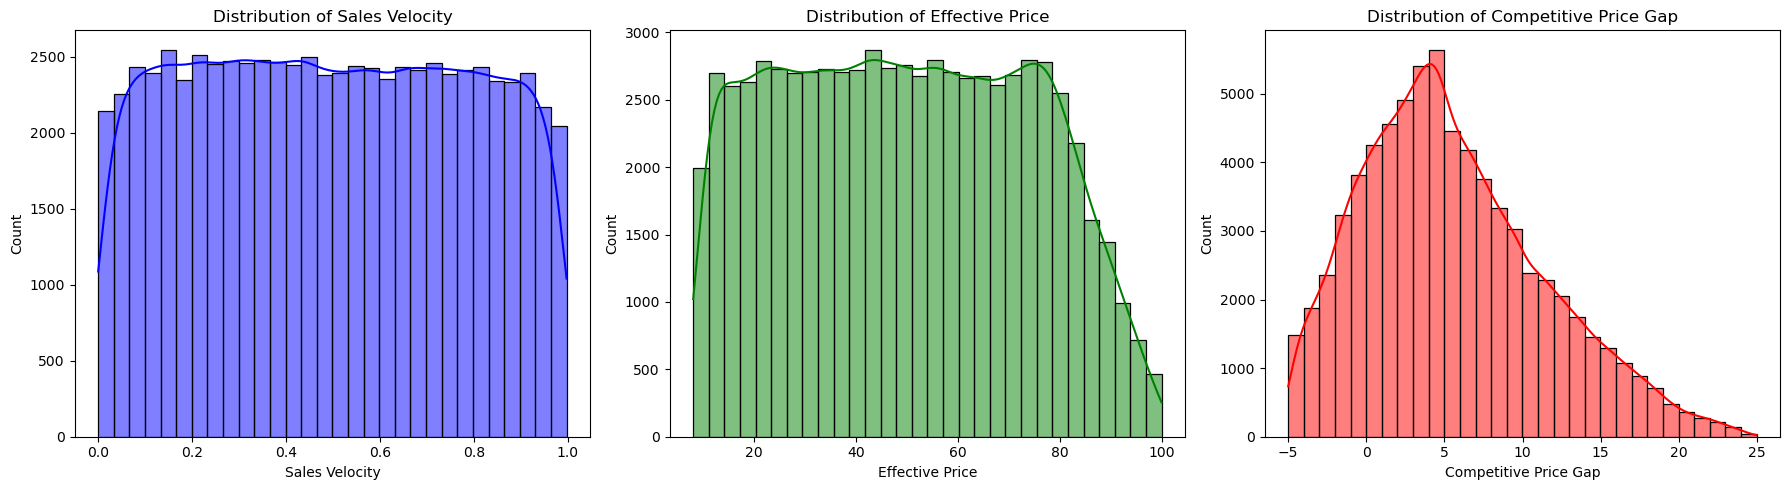

In [45]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Checking Sales Velocity Distribution
sns.histplot(df["Sales Velocity"], bins=30, kde=True, ax=axes[0], color="blue")
axes[0].set_title("Distribution of Sales Velocity")
axes[0].set_xlabel("Sales Velocity")

# Checking Effective Price Distribution
sns.histplot(df["Effective Price"], bins=30, kde=True, ax=axes[1], color="green")
axes[1].set_title("Distribution of Effective Price")
axes[1].set_xlabel("Effective Price")

# Checking Competitive Price Gap Distribution
sns.histplot(df["Competitive Price Gap"], bins=30, kde=True, ax=axes[2], color="red")
axes[2].set_title("Distribution of Competitive Price Gap")
axes[2].set_xlabel("Competitive Price Gap")

plt.tight_layout()
plt.show()


## Applying Variance and Corelation Analysis on new columns to decide whether we should keep them or remove the new columns


 Correlation Analysis with Sales Velocity 
╒═══════════════════════╤══════════════════╕
│ index                 │   Sales Velocity │
╞═══════════════════════╪══════════════════╡
│ Inventory Level       │      -0.0343808  │
├───────────────────────┼──────────────────┤
│ Units Sold            │       0.719201   │
├───────────────────────┼──────────────────┤
│ Units Ordered         │      -0.00184945 │
├───────────────────────┼──────────────────┤
│ Demand Forecast       │       0.715744   │
├───────────────────────┼──────────────────┤
│ Price                 │      -0.00292735 │
├───────────────────────┼──────────────────┤
│ Discount              │      -0.00198158 │
├───────────────────────┼──────────────────┤
│ Holiday/Promotion     │      -0.00238723 │
├───────────────────────┼──────────────────┤
│ Competitor Pricing    │      -0.00305951 │
├───────────────────────┼──────────────────┤
│ Month                 │      -0.00110407 │
├───────────────────────┼──────────────────┤
│ Sales Vel

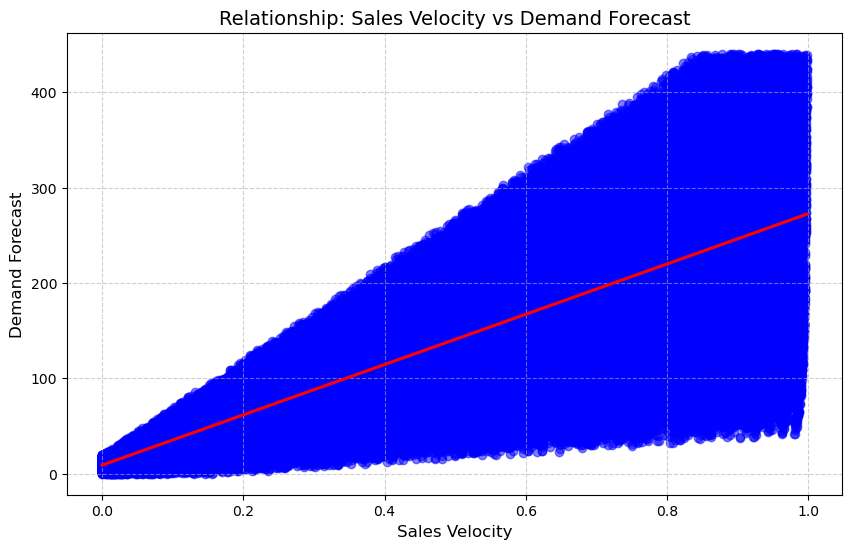

In [47]:
# Step 1: Select Numeric Columns
numeric_df = df.select_dtypes(include=["number"])

# Step 2: Compute Correlation with Sales Velocity
correlation_matrix = numeric_df.corr()[["Sales Velocity"]].reset_index()

# Step 3: Compute Variance of Sales Velocity
variance = df["Sales Velocity"].var()

# Step 4: Display Correlation Analysis as a Clean Table
print("\n Correlation Analysis with Sales Velocity ")
print(tabulate(correlation_matrix, headers="keys", tablefmt="fancy_grid", showindex=False))

# Step 5: Display Variance Analysis as a Clean Table
variance_df = pd.DataFrame({"Metric": ["Sales Velocity Variance"], "Value": [variance]})
print("\n Variance Analysis ")
print(tabulate(variance_df, headers="keys", tablefmt="fancy_grid", showindex=False))

# Step 6: Decision Rule for Keeping Sales Velocity
if variance > 0 and numeric_df["Sales Velocity"].abs().sum() > 0.5:
    print("\n Conclusion: 'Sales Velocity' is 'Useful' and should be kept in the dataset.")
else:
    print("\n Conclusion: 'Sales Velocity' is 'Redundant' and can be dropped.")

# Step 7: Visualization - Scatter Plot with Regression Line
plt.figure(figsize=(10, 6))
sns.regplot(x=df["Sales Velocity"], y=df["Demand Forecast"], 
            scatter_kws={"alpha": 0.5, "color": "blue"}, 
            line_kws={"color": "red"}, marker="o")

# Customize Labels and Title
plt.xlabel("Sales Velocity", fontsize=12)
plt.ylabel("Demand Forecast", fontsize=12)
plt.title("Relationship: Sales Velocity vs Demand Forecast", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)

# Show the plot
plt.show()



 'Competitive Price Gap' successfully computed.

 Correlation Analysis with Competitive Price Gap 
╒═══════════════════════╤═════════════════════════╕
│ index                 │   Competitive Price Gap │
╞═══════════════════════╪═════════════════════════╡
│ Inventory Level       │             0.00916347  │
├───────────────────────┼─────────────────────────┤
│ Units Sold            │             0.00288814  │
├───────────────────────┼─────────────────────────┤
│ Units Ordered         │             0.00307657  │
├───────────────────────┼─────────────────────────┤
│ Demand Forecast       │             0.00245228  │
├───────────────────────┼─────────────────────────┤
│ Price                 │             0.449913    │
├───────────────────────┼─────────────────────────┤
│ Discount              │             0.67223     │
├───────────────────────┼─────────────────────────┤
│ Holiday/Promotion     │            -0.000949444 │
├───────────────────────┼─────────────────────────┤
│ Competitor Pri

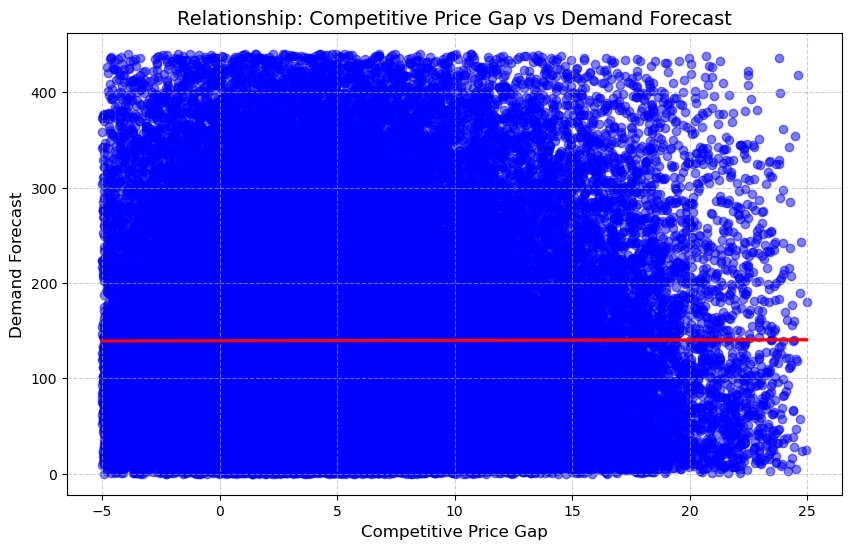


 Conclusion: 'Competitive Price Gap' is 'Redundant' and will be dropped.


In [48]:
# Step 1: Compute Competitive Price Gap (If Required Columns Exist)
if "Competitor Pricing" in df.columns and "Effective Price" in df.columns:
    df["Competitive Price Gap"] = df["Competitor Pricing"] - df["Effective Price"]
    print("\n 'Competitive Price Gap' successfully computed.")
else:
    print("\n Skipping computation: Required columns are missing.")

# Step 2: Select Numeric Columns
numeric_df = df.select_dtypes(include=["number"])

# Step 3: Compute Correlation (If 'Competitive Price Gap' Exists)
if "Competitive Price Gap" in numeric_df.columns:
    correlation_matrix = numeric_df.corr()[["Competitive Price Gap"]].reset_index()

    # Step 4: Compute Variance for Competitive Price Gap
    variance_df = pd.DataFrame({
        "Metric": ["Competitive Price Gap Variance"],
        "Value": [df["Competitive Price Gap"].var()]
    })

    # Step 5: Display Correlation Analysis as a Clean Table
    print("\n Correlation Analysis with Competitive Price Gap ")
    print(tabulate(correlation_matrix, headers="keys", tablefmt="fancy_grid", showindex=False))

    # Step 6: Display Variance Analysis as a Clean Table
    print("\n Variance Analysis for Competitive Price Gap ")
    print(tabulate(variance_df, headers="keys", tablefmt="fancy_grid", showindex=False))

    # Step 7: Visualization - Scatter Plot with Regression Line (If 'Demand Forecast' Exists)
    if "Demand Forecast" in df.columns:
        plt.figure(figsize=(10, 6))
        sns.regplot(x=df["Competitive Price Gap"], y=df["Demand Forecast"],
                    scatter_kws={"alpha": 0.5, "color": "blue"},
                    line_kws={"color": "red"}, marker="o")

        # Customize Labels and Title
        plt.xlabel("Competitive Price Gap", fontsize=12)
        plt.ylabel("Demand Forecast", fontsize=12)
        plt.title("Relationship: Competitive Price Gap vs Demand Forecast", fontsize=14)
        plt.grid(True, linestyle="--", alpha=0.6)

        # Show the plot
        plt.show()
    else:
        print("\n Skipping visualization: 'Demand Forecast' column not found.")

    # Step 8: Decision Rule - Keep or Drop Competitive Price Gap
    if variance_df["Value"].values[0] > 0 and correlation_matrix["Competitive Price Gap"].abs().sum() > 1:
        print("\n Conclusion: 'Competitive Price Gap' is 'Redundant' and will be dropped.")
        df.drop(columns=["Competitive Price Gap"], inplace=True)
    else:
        print("\nConclusion: 'Competitive Price Gap' is 'Useful' and will be kept.")
else:
    print("\n Skipping correlation analysis: 'Competitive Price Gap' not found.")



 'Effective Price' computed successfully.

 Correlation Analysis for Effective Price
╒════════════════════╤═══════════════════╕
│ index              │   Effective Price │
╞════════════════════╪═══════════════════╡
│ Inventory Level    │        0.00930522 │
├────────────────────┼───────────────────┤
│ Units Sold         │        0.00330405 │
├────────────────────┼───────────────────┤
│ Units Ordered      │        0.00413851 │
├────────────────────┼───────────────────┤
│ Demand Forecast    │        0.00292411 │
├────────────────────┼───────────────────┤
│ Price              │        0.983391   │
├────────────────────┼───────────────────┤
│ Discount           │       -0.163295   │
├────────────────────┼───────────────────┤
│ Holiday/Promotion  │        0.00263184 │
├────────────────────┼───────────────────┤
│ Competitor Pricing │        0.977306   │
├────────────────────┼───────────────────┤
│ Month              │       -0.00797658 │
├────────────────────┼───────────────────┤
│ Sales Vel

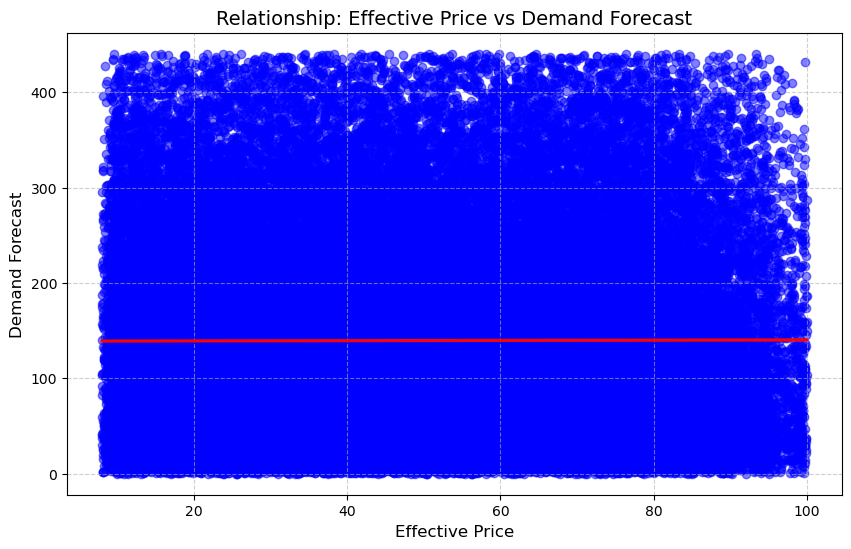


 Conclusion: 'Effective Price' is 'Redundant' and will be dropped from the dataset.


In [49]:
# Step 1: Compute 'Effective Price' (If Required Columns Exist)
if "Price" in df.columns and "Discount" in df.columns:
    df["Effective Price"] = df["Price"] * (1 - df["Discount"] / 100)
    print("\n 'Effective Price' computed successfully.")
else:
    print("\n Skipping computation: Missing required columns ('Price' or 'Discount').")

# Step 2: Select Only Numeric Columns
numeric_df = df.select_dtypes(include=["number"])

# Step 3: Compute Correlation for 'Effective Price' (If Exists)
if "Effective Price" in numeric_df.columns:
    correlation_matrix = numeric_df.corr()[["Effective Price"]].reset_index()

    # Step 4: Compute Variance for 'Effective Price'
    variance_df = pd.DataFrame({
        "Metric": ["Effective Price Variance"],
        "Value": [df["Effective Price"].var()]
    })

    # Step 5: Display Correlation Analysis
    print("\n Correlation Analysis for Effective Price")
    print(tabulate(correlation_matrix, headers="keys", tablefmt="fancy_grid", showindex=False))

    # Step 6: Display Variance Analysis
    print("\n Variance Analysis for Effective Price")
    print(tabulate(variance_df, headers="keys", tablefmt="fancy_grid", showindex=False))

    # Step 7: Scatter Plot - Effective Price vs Demand Forecast
    if "Demand Forecast" in df.columns:
        plt.figure(figsize=(10, 6))
        sns.regplot(x=df["Effective Price"], y=df["Demand Forecast"], 
                    scatter_kws={"alpha": 0.5, "color": "blue"}, 
                    line_kws={"color": "red"}, marker="o")

        # Customize Labels and Title
        plt.xlabel("Effective Price", fontsize=12)
        plt.ylabel("Demand Forecast", fontsize=12)
        plt.title("Relationship: Effective Price vs Demand Forecast", fontsize=14)
        plt.grid(True, linestyle="--", alpha=0.6)

        # Show the Plot
        plt.show()
    else:
        print("\n Skipping plot: 'Demand Forecast' column not found.")

    # Step 8: Decision Rule - Keep or Drop 'Effective Price'
    if variance_df["Value"].values[0] > 0 and correlation_matrix["Effective Price"].abs().sum() > 1:
        print("\n Conclusion: 'Effective Price' is 'Redundant' and will be dropped from the dataset.")
        df.drop(columns=["Effective Price"], inplace=True)
    else:
        print("\n Conclusion: 'Effective Price' is 'Useful' and will be kept in the dataset.")
else:
    print("\n Skipping correlation analysis: 'Effective Price' not found.")


## After applying Variance Analysis only Sales velocity column useful so its Distribution by Density and Boxplot Graphs

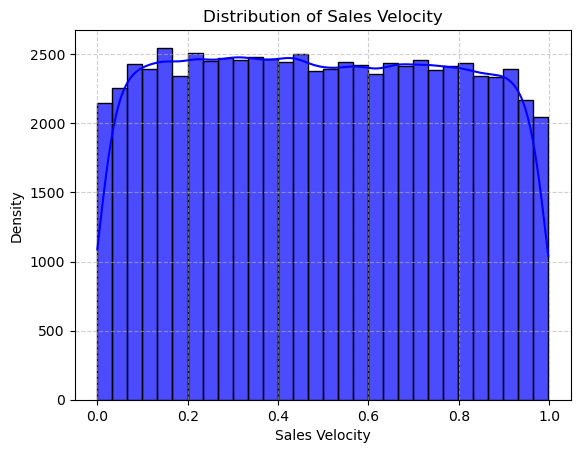

In [51]:
sns.histplot(df["Sales Velocity"], kde=True, bins=30, color="blue", alpha=0.7)
plt.xlabel("Sales Velocity")
plt.ylabel("Density")
plt.title("Distribution of Sales Velocity")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


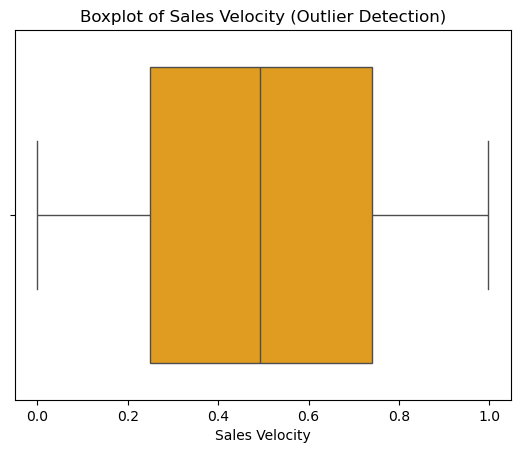

In [52]:
sns.boxplot(x=df["Sales Velocity"], color="orange")
plt.title("Boxplot of Sales Velocity (Outlier Detection)")
plt.show()


## Cheecking Corelation Map 

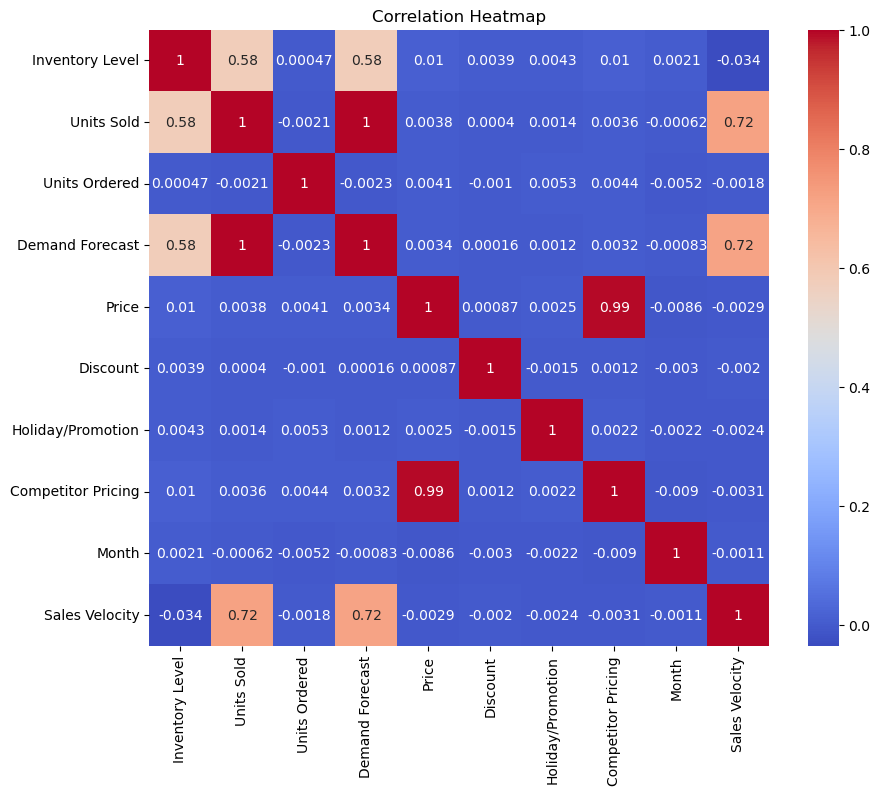

In [54]:
numeric_data = df.select_dtypes(include=['number'])  # Select only numeric columns
corr = numeric_data.corr()  # Compute correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

## Abhilash Work Starts 

Adding 2 new Columns Rolling Mean and Rolling std on Demand Forecast to reduce Overfitting.

In [57]:
df['Rolling_Mean_7'] = df['Demand Forecast'].rolling(window=7).mean()
df['Rolling_Std_7'] = df['Demand Forecast'].rolling(window=7).std()

In [58]:
df.head()

Date Store ID Product ID     Category Region  Inventory Level  \
0 2022-01-01     S001      P0001    Groceries  North              231   
1 2022-01-01     S001      P0002         Toys  South              204   
2 2022-01-01     S001      P0003         Toys   West              102   
3 2022-01-01     S001      P0004         Toys  North              469   
4 2022-01-01     S001      P0005  Electronics   East              166   

   Units Sold  Units Ordered  Demand Forecast  Price  Discount  \
0         127             55           135.47  33.50        20   
1         150             66           144.04  63.01        20   
2          65             51            74.02  27.99        10   
3          61            164            62.18  32.72        10   
4          14            135             9.26  73.64         0   

  Weather Condition  Holiday/Promotion  Competitor Pricing Seasonality  \
0             Rainy                  0               29.69      Autumn   
1             Sunny                  0               66.16      Autumn   
2             Sunny                  1               31.32      Summer   
3            Cloudy                  1               34.74      Autumn   
4             Sunny                  0               68.95      Summer   

    Weekday  Month  Sales Velocity  Rolling_Mean_7  Rolling_Std_7  
0  Saturday      1        0.547414             NaN            NaN  
1  Saturday      1        0.731707             NaN            NaN  
2  Saturday      1        0.631068             NaN            NaN  
3  Saturday      1        0.129787             NaN            NaN  
4  Saturday      1        0.083832             NaN            NaN

# To handle Missing Values

In [60]:
df.fillna(0, inplace=True)

In [61]:
df.head(10)

Date Store ID Product ID     Category Region  Inventory Level  \
0 2022-01-01     S001      P0001    Groceries  North              231   
1 2022-01-01     S001      P0002         Toys  South              204   
2 2022-01-01     S001      P0003         Toys   West              102   
3 2022-01-01     S001      P0004         Toys  North              469   
4 2022-01-01     S001      P0005  Electronics   East              166   
5 2022-01-01     S001      P0006    Groceries  South              138   
6 2022-01-01     S001      P0007    Furniture   East              359   
7 2022-01-01     S001      P0008     Clothing  North              380   
8 2022-01-01     S001      P0009  Electronics   West              183   
9 2022-01-01     S001      P0010         Toys  South              108   

   Units Sold  Units Ordered  Demand Forecast  Price  Discount  \
0         127             55           135.47  33.50        20   
1         150             66           144.04  63.01        20   
2          65             51            74.02  27.99        10   
3          61            164            62.18  32.72        10   
4          14            135             9.26  73.64         0   
5         128            102           139.82  76.83        10   
6          97            167           108.92  34.16        10   
7         312             54           329.73  97.99         5   
8         175            135           174.15  20.74        10   
9          28            196            24.47  59.99         0   

  Weather Condition  Holiday/Promotion  Competitor Pricing Seasonality  \
0             Rainy                  0               29.69      Autumn   
1             Sunny                  0               66.16      Autumn   
2             Sunny                  1               31.32      Summer   
3            Cloudy                  1               34.74      Autumn   
4             Sunny                  0               68.95      Summer   
5             Sunny                  1               79.35      Winter   
6             Rainy                  1               36.55      Winter   
7            Cloudy                  0              100.09      Spring   
8            Cloudy                  0               17.66      Autumn   
9             Rainy                  1               61.21      Winter   

    Weekday  Month  Sales Velocity  Rolling_Mean_7  Rolling_Std_7  
0  Saturday      1        0.547414        0.000000       0.000000  
1  Saturday      1        0.731707        0.000000       0.000000  
2  Saturday      1        0.631068        0.000000       0.000000  
3  Saturday      1        0.129787        0.000000       0.000000  
4  Saturday      1        0.083832        0.000000       0.000000  
5  Saturday      1        0.920863        0.000000       0.000000  
6  Saturday      1        0.269444       96.244286      50.171645  
7  Saturday      1        0.818898      123.995714     102.216350  
8  Saturday      1        0.951087      128.297143     103.821366  
9  Saturday      1        0.256881      121.218571     109.663562

## Some Plots on New columns vs Demand Forecast and Boxplot of Demand Forecast by store wise

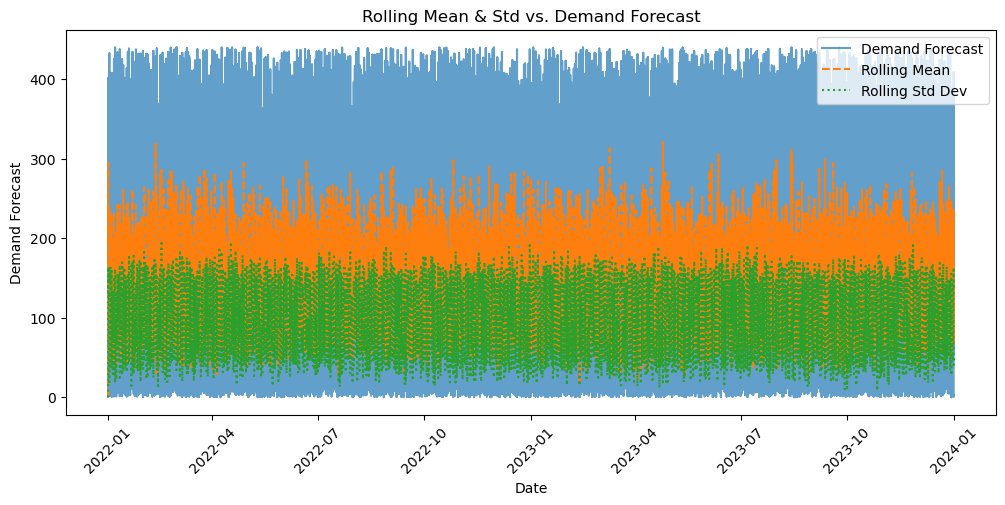

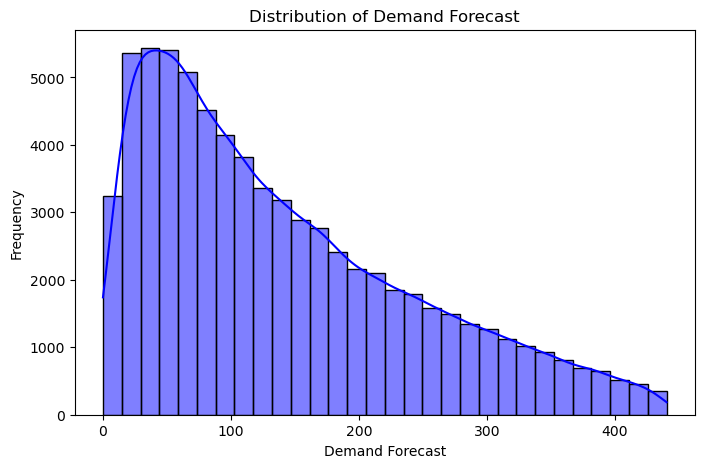

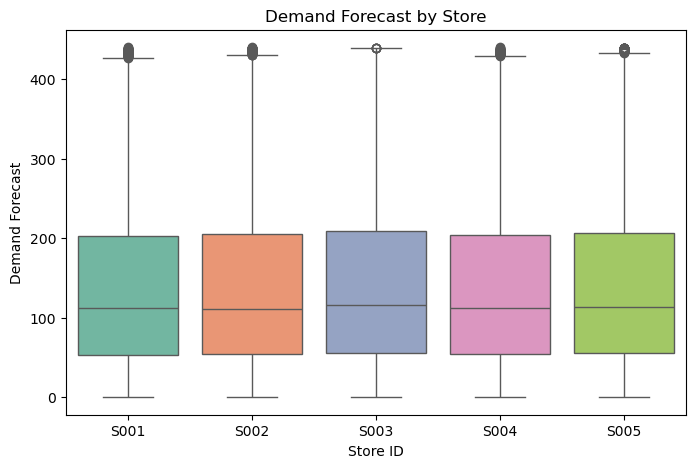

In [63]:
# 1. Rolling Mean & Std vs Demand Forecast
plt.figure(figsize=(12, 5))
plt.plot(df['Date'], df['Demand Forecast'], label='Demand Forecast', alpha=0.7)
plt.plot(df['Date'], df['Rolling_Mean_7'], label='Rolling Mean', linestyle='--')
plt.plot(df['Date'], df['Rolling_Std_7'], label='Rolling Std Dev', linestyle=':')
plt.legend()
plt.title("Rolling Mean & Std vs. Demand Forecast")
plt.xlabel("Date")
plt.ylabel("Demand Forecast")
plt.xticks(rotation=45)
plt.show()

# 2. Histogram & KDE Plot
plt.figure(figsize=(8, 5))
sns.histplot(df['Demand Forecast'], bins=30, kde=True, color='blue')
plt.title("Distribution of Demand Forecast")
plt.xlabel("Demand Forecast")
plt.ylabel("Frequency")
plt.show()

# 3. Boxplot of Demand Forecast by Store
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Store ID"], y=df["Demand Forecast"], palette="Set2")
plt.title("Demand Forecast by Store")
plt.xlabel("Store ID")
plt.ylabel("Demand Forecast")
plt.show()


## Checking Correlation Heatmap Finally after adding new columns and  Before Encoding 

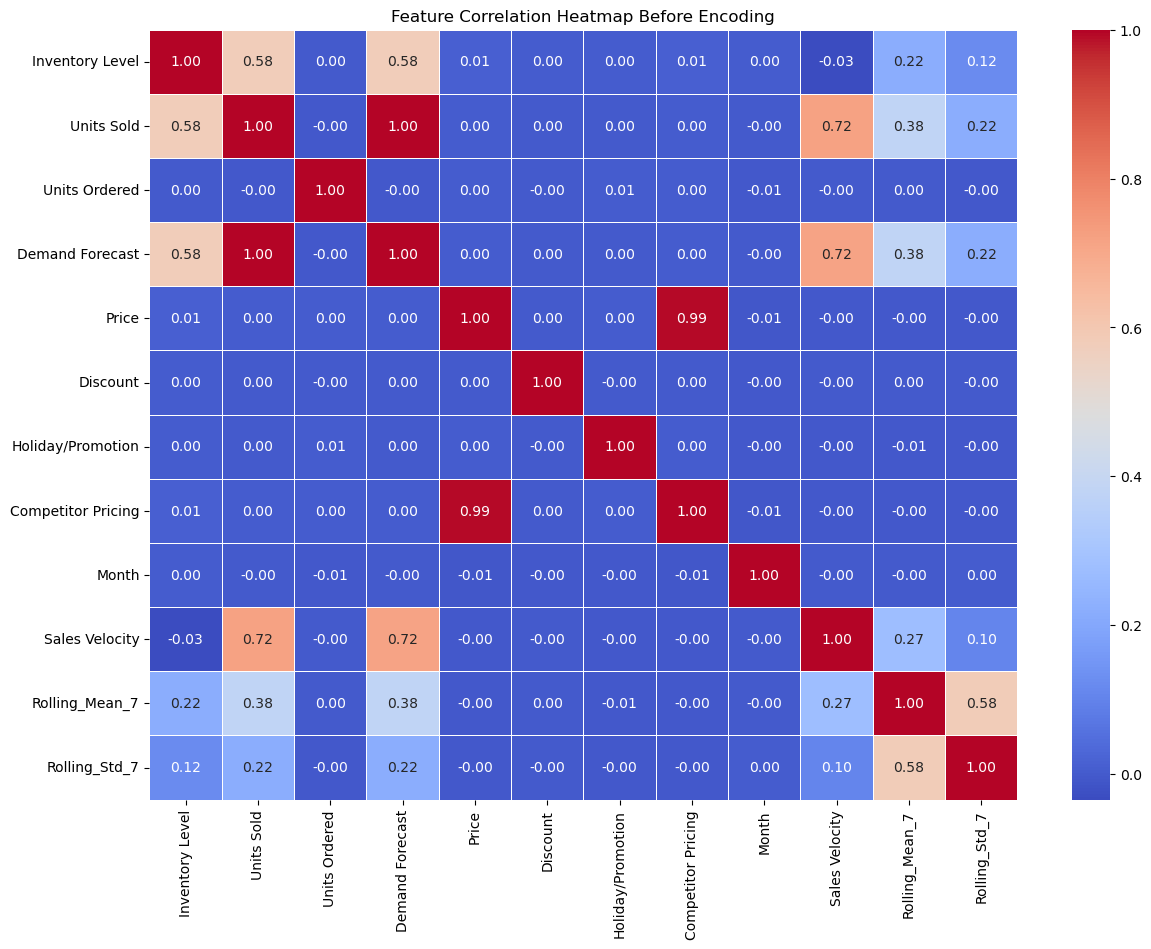

In [65]:
corr_matrix = df.select_dtypes(include=['number']).corr()

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Heatmap Before Encoding')
plt.show()

Normalization Of Numerical Data

In [67]:
# Function for manual Min-Max Scaling
def minmax_scaling(series):
    return (series - series.min()) / (series.max() - series.min())

# Function for manual Z-score Normalization
def zscore_scaling(series):
    return (series - series.mean()) / series.std()


# Checking which one is best suitable by graphs and Variance Analysis

In [69]:
# Assuming 'df' is already loaded
df_original = df.copy()  # Keep the original for reference
df_minmax = df.copy()  # Min-Max Scaled DataFrame
df_zscore = df.copy()  # Z-score Normalized DataFrame

# Identify numerical columns (excluding categorical ones)
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()

# Remove the target variable 'Demand Forecast' (we don't scale the target)
numerical_cols.remove("Demand Forecast")  

print("Numerical Columns:", numerical_cols)


Numerical Columns: ['Inventory Level', 'Units Sold', 'Units Ordered', 'Price', 'Discount', 'Holiday/Promotion', 'Competitor Pricing', 'Month', 'Sales Velocity', 'Rolling_Mean_7', 'Rolling_Std_7']


In [70]:
# Apply Min-Max Scaling and Z-score Normalization to numerical columns
for col in numerical_cols:
    df_minmax[col] = minmax_scaling(df[col])
    df_zscore[col] = zscore_scaling(df[col])


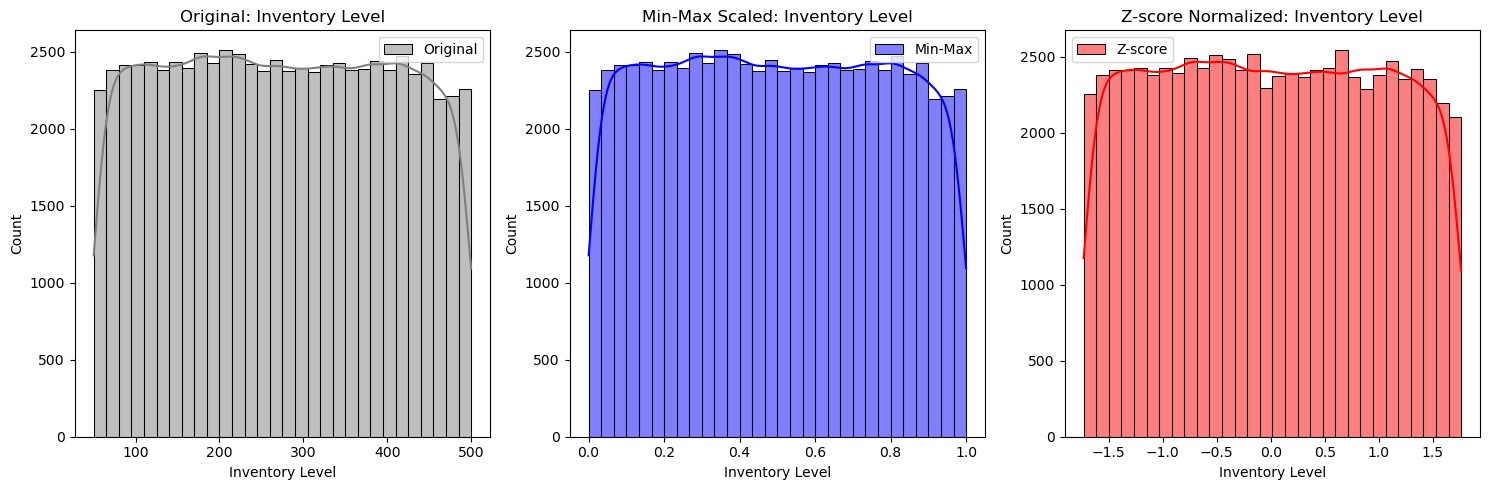

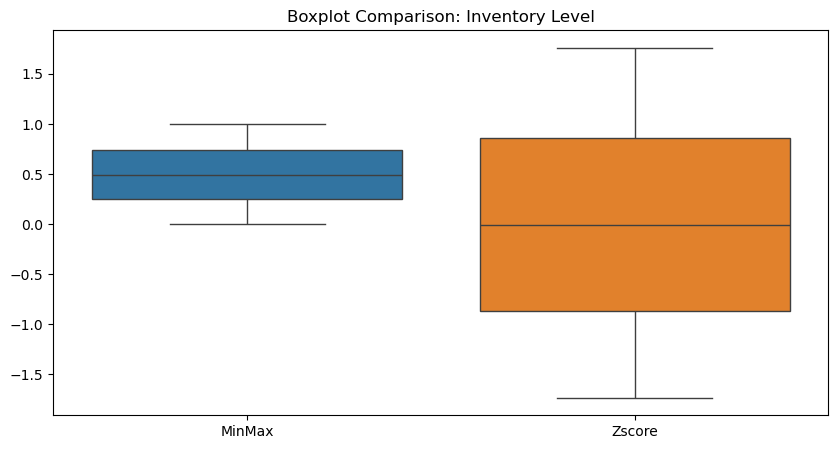

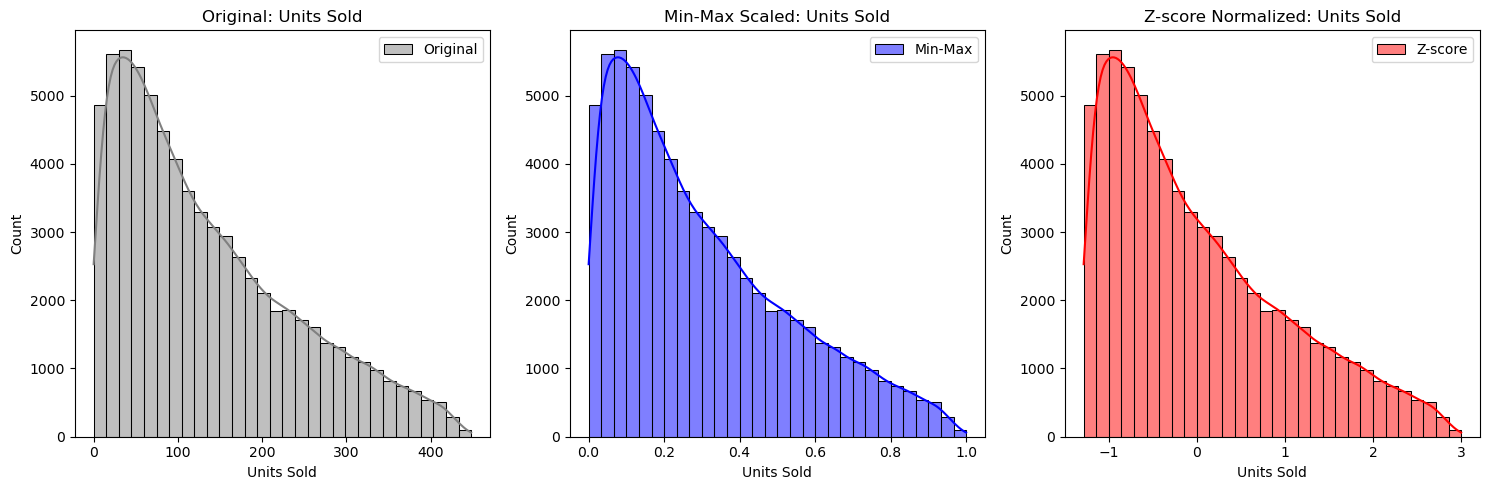

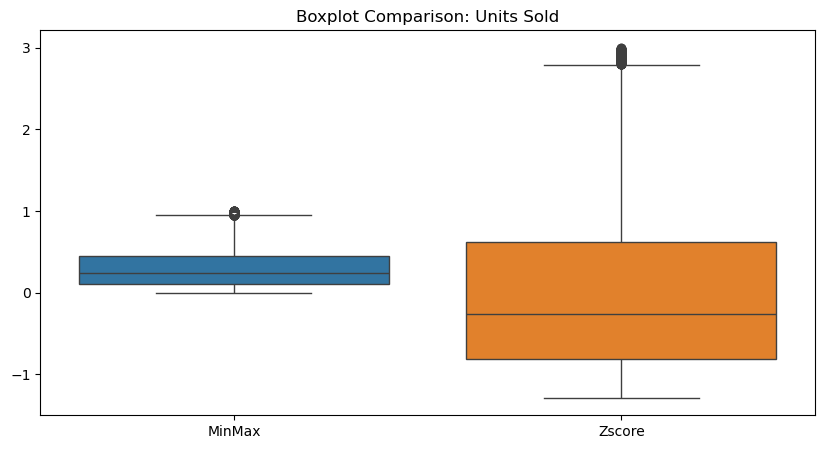

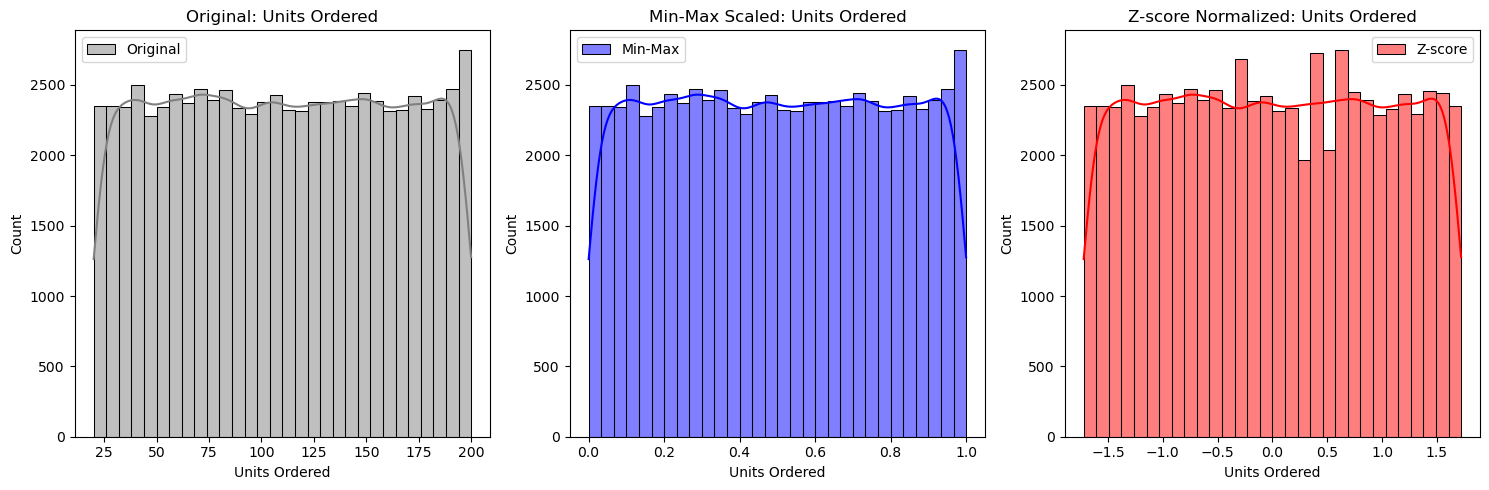

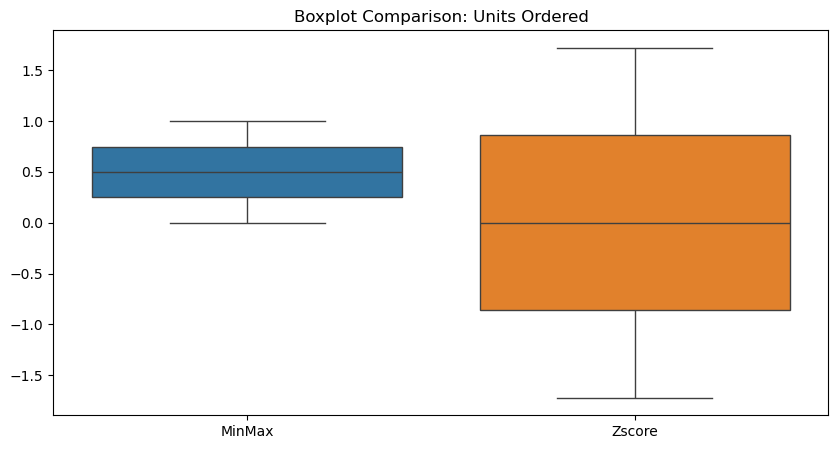

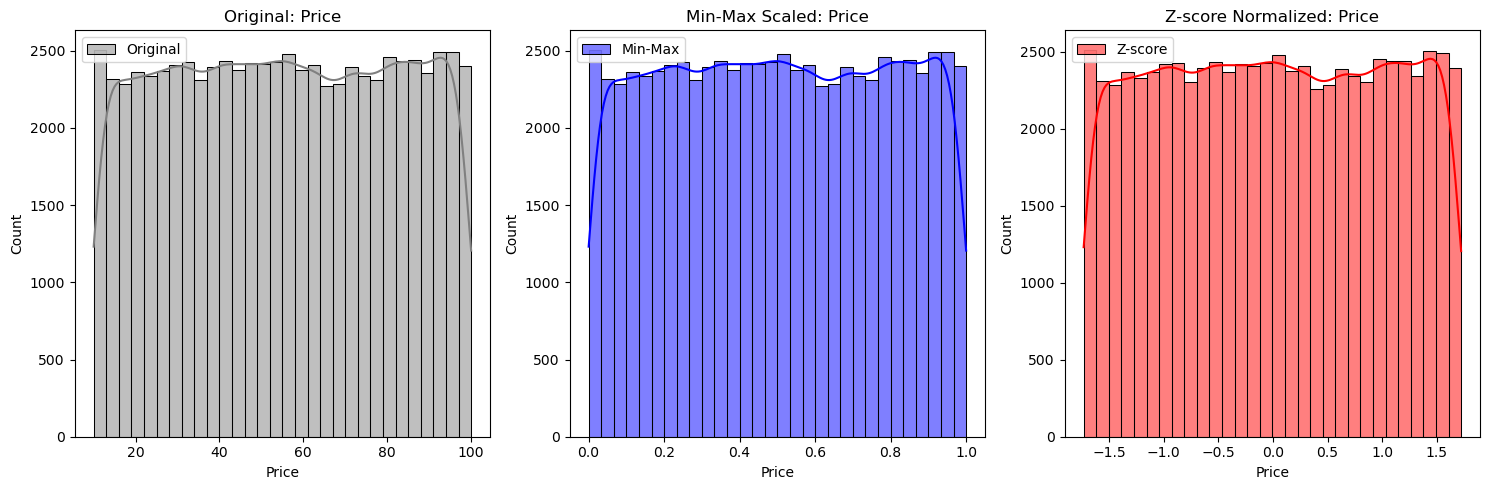

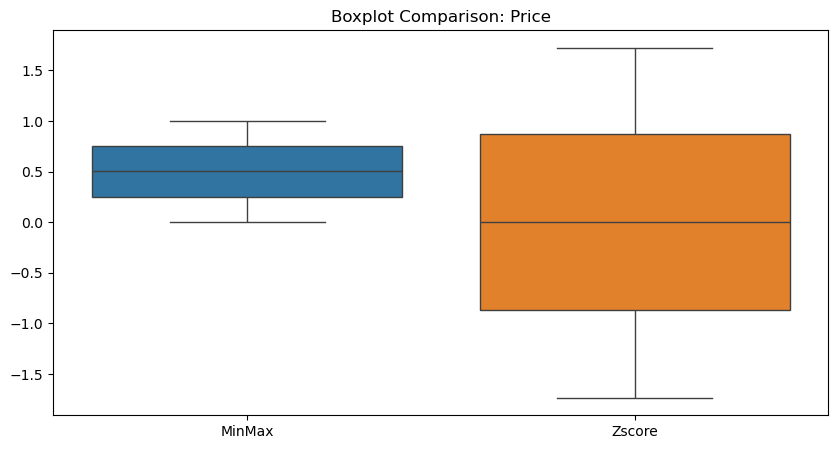

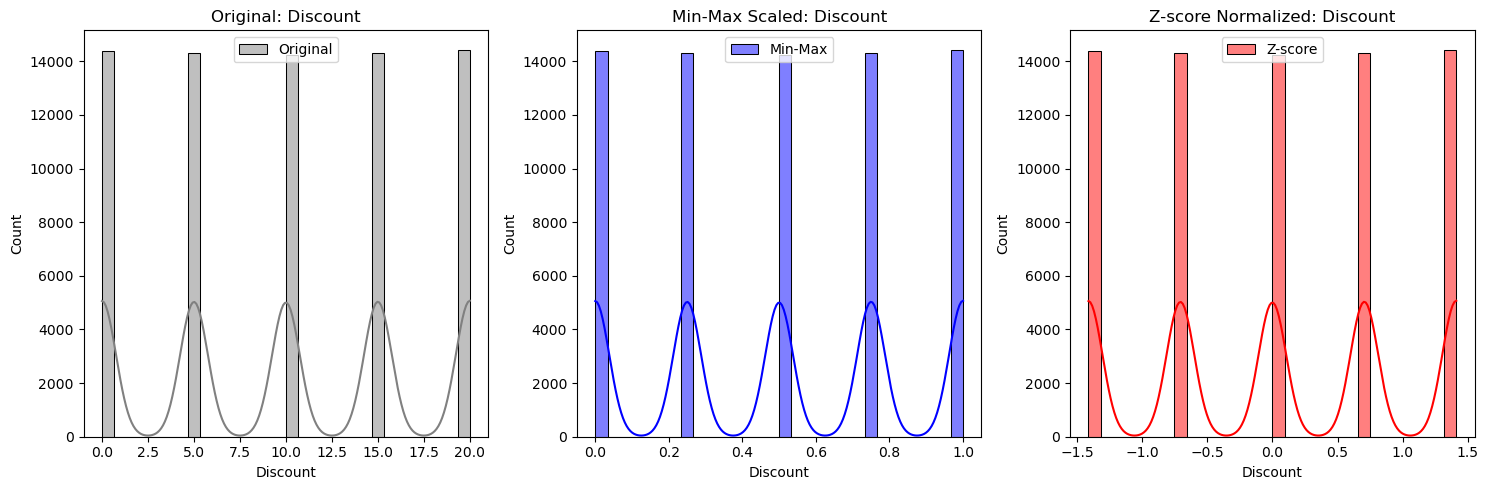

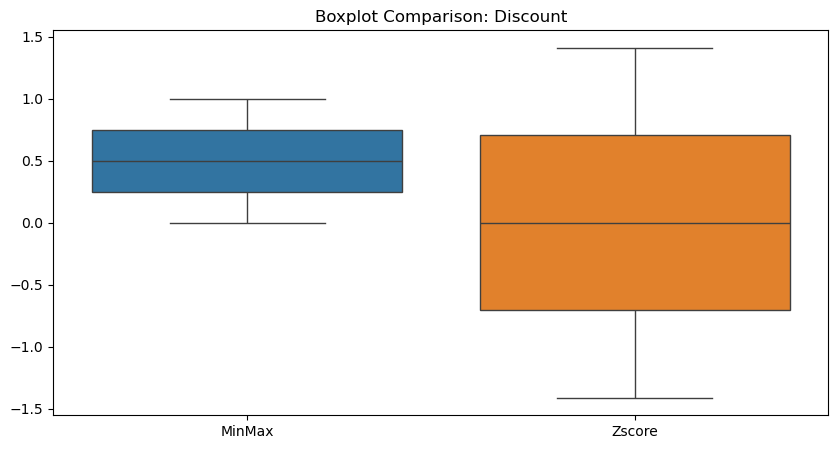

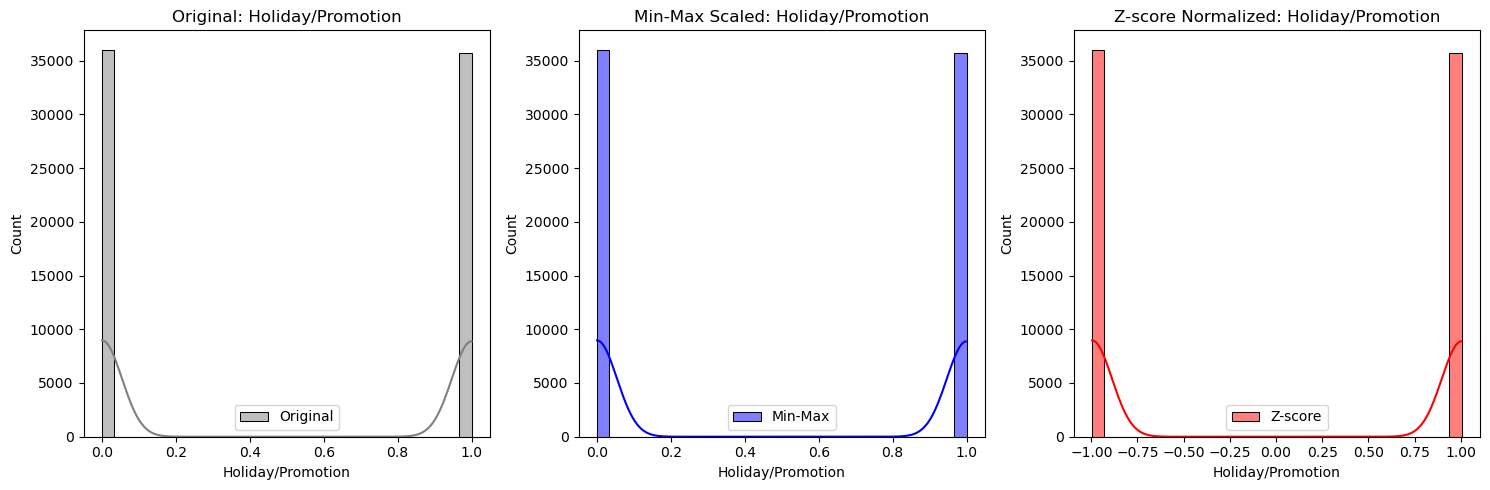

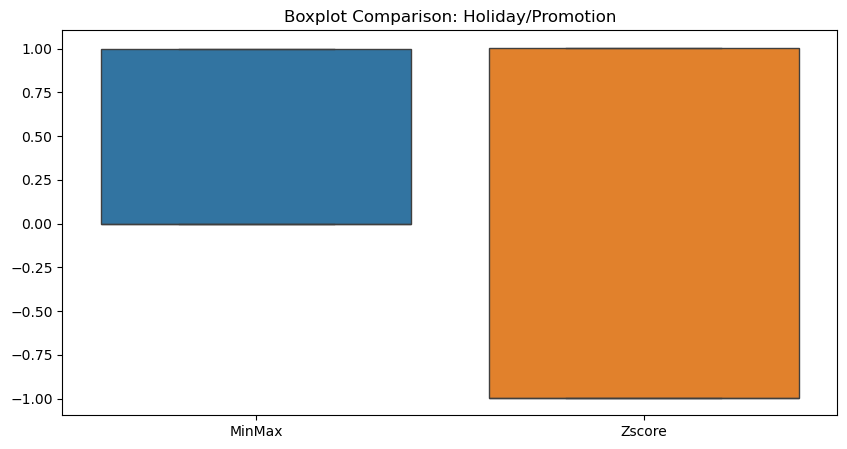

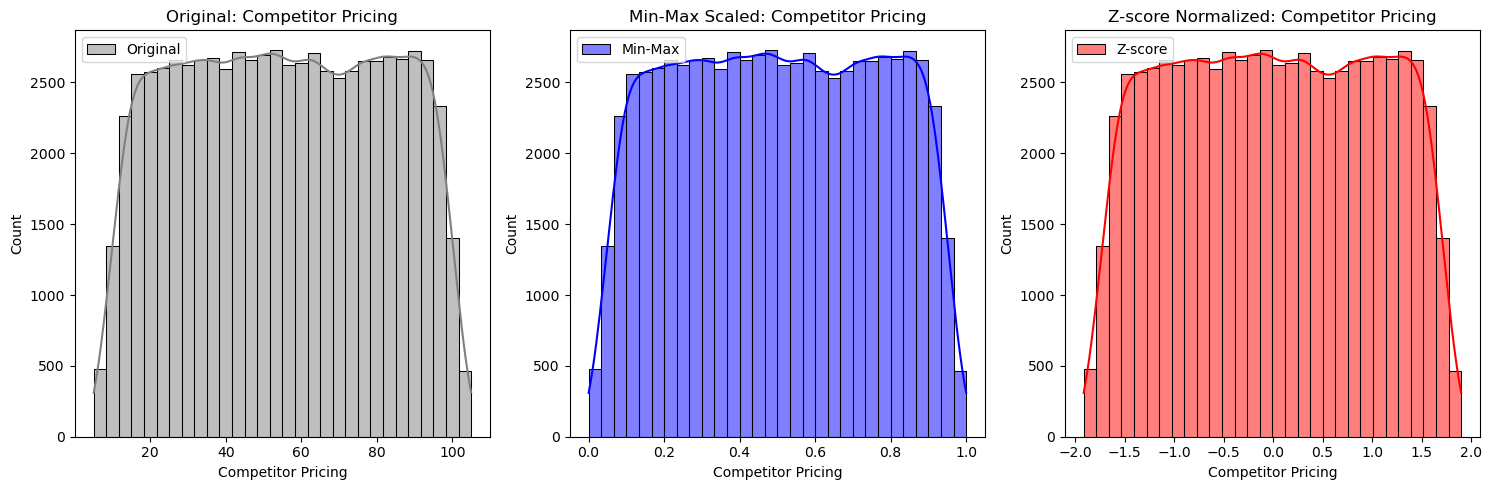

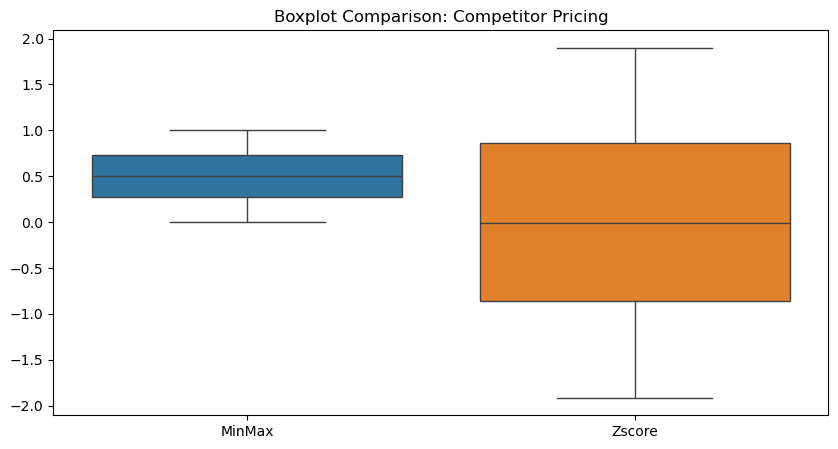

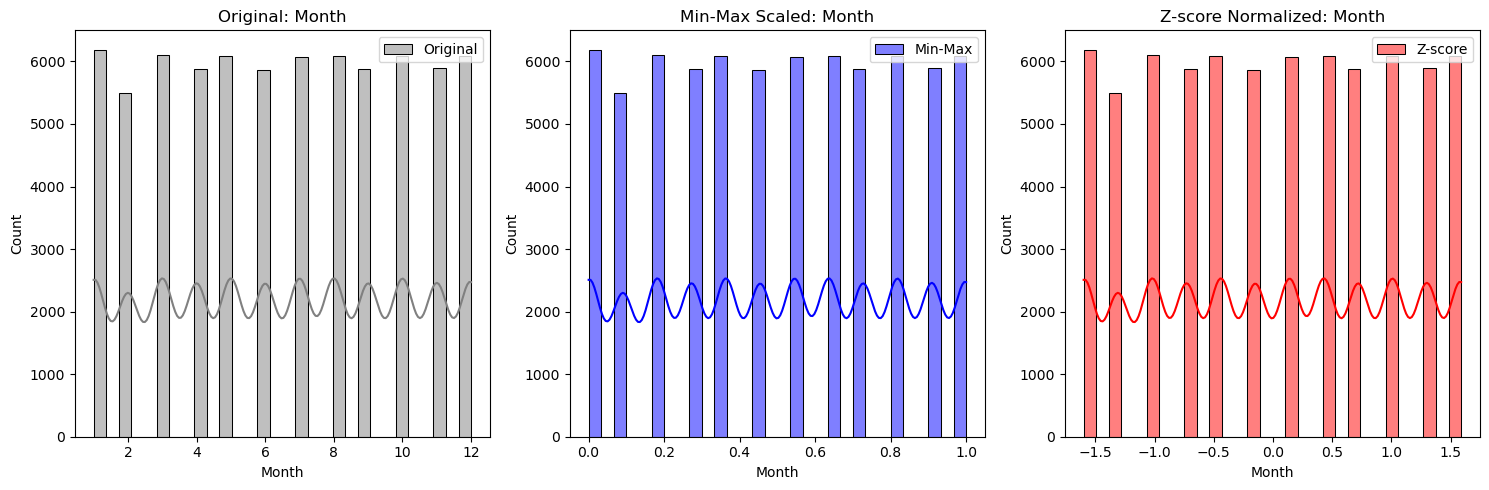

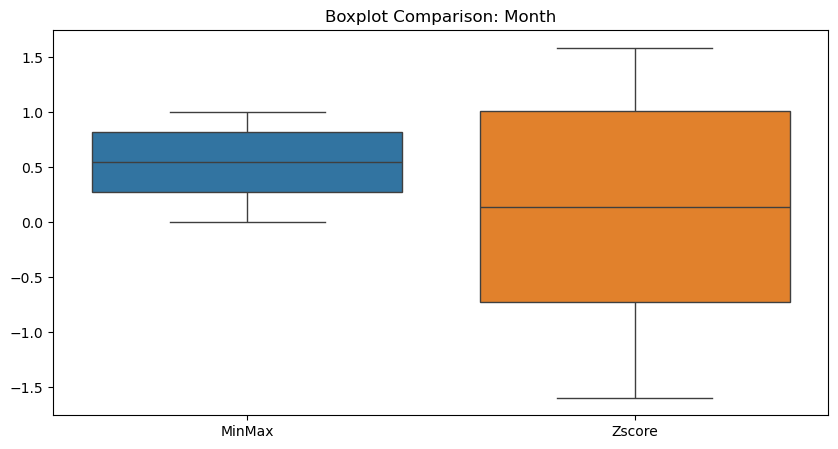

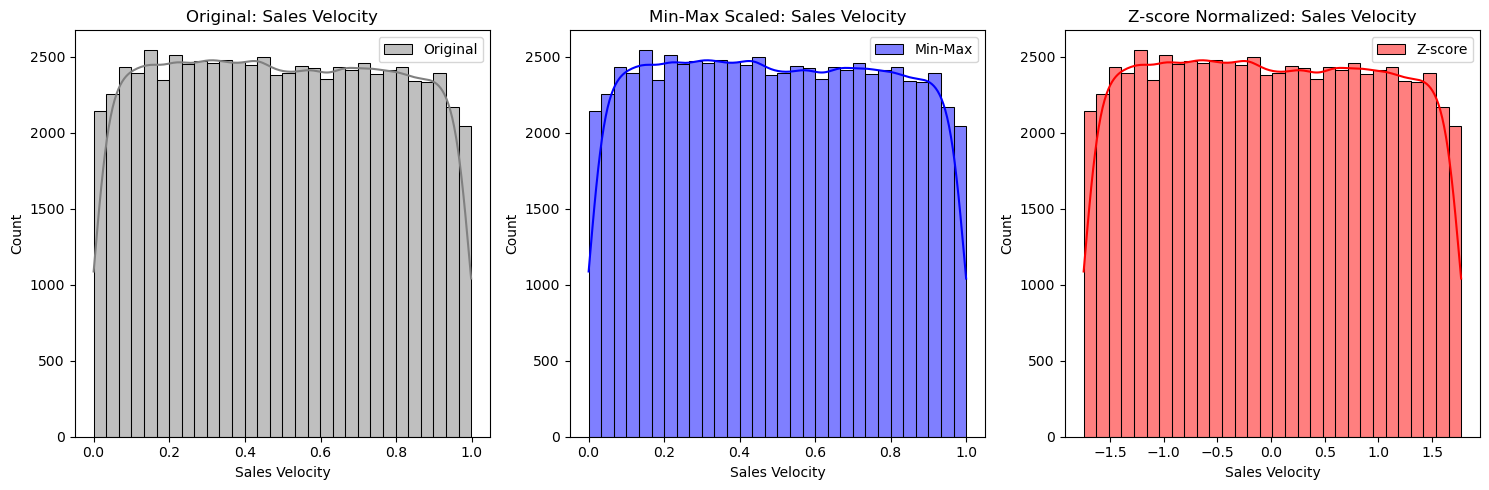

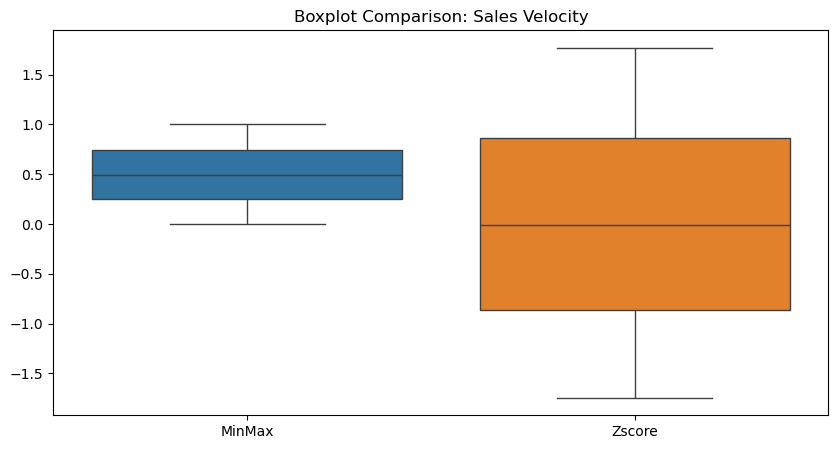

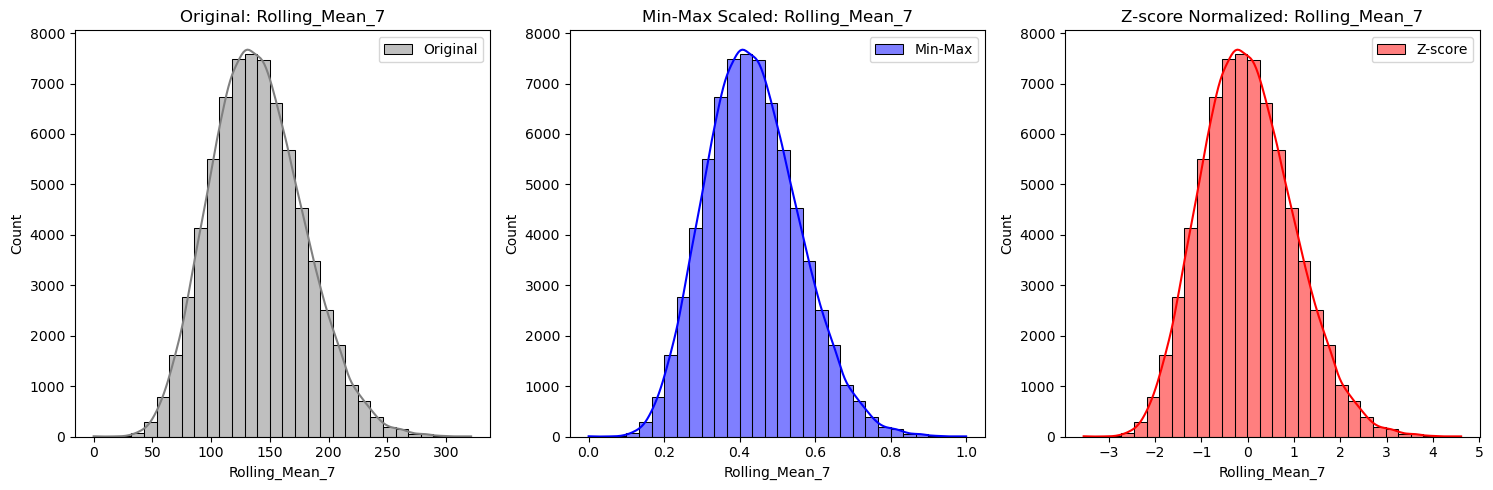

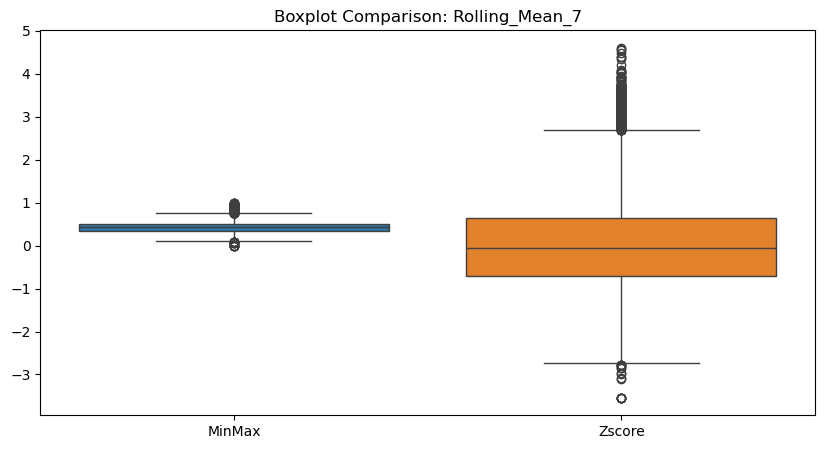

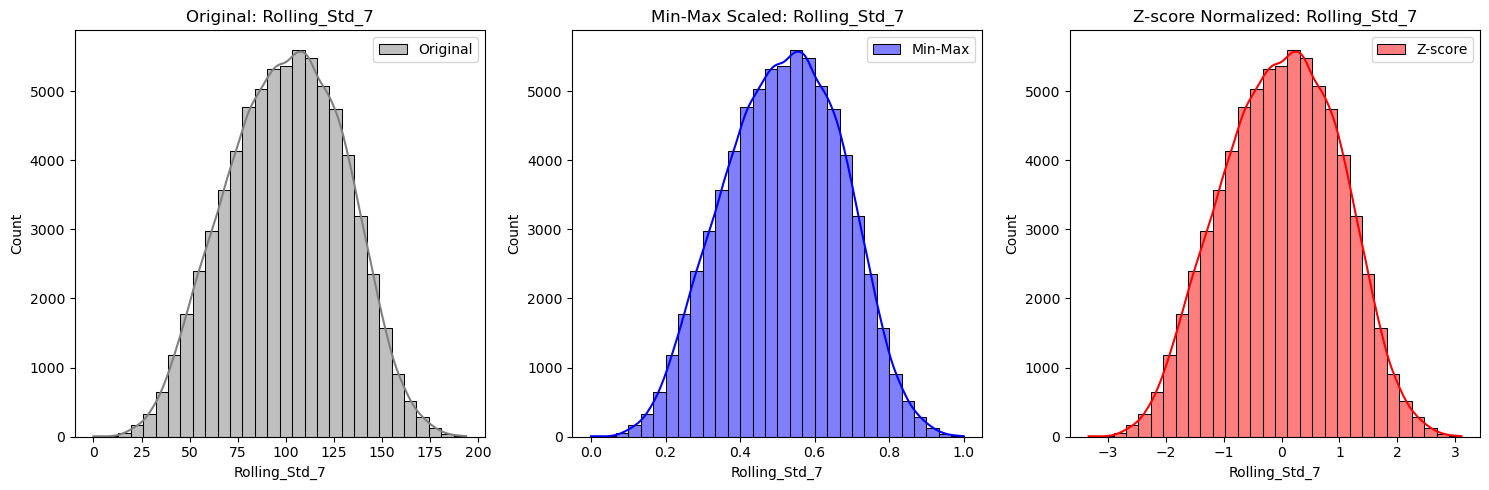

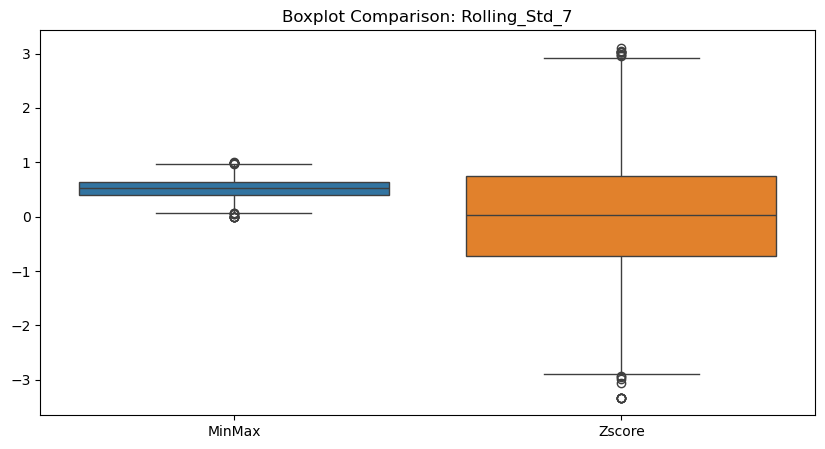

In [71]:
# Function to plot distributions before & after scaling
def plot_comparison(original_df, minmax_df, zscore_df, col):
    plt.figure(figsize=(15, 5))
    
    # Histogram comparison
    plt.subplot(1, 3, 1)
    sns.histplot(original_df[col], bins=30, kde=True, color="gray", label="Original")
    plt.title(f"Original: {col}")
    plt.legend()

    plt.subplot(1, 3, 2)
    sns.histplot(minmax_df[col], bins=30, kde=True, color="blue", label="Min-Max")
    plt.title(f"Min-Max Scaled: {col}")
    plt.legend()

    plt.subplot(1, 3, 3)
    sns.histplot(zscore_df[col], bins=30, kde=True, color="red", label="Z-score")
    plt.title(f"Z-score Normalized: {col}")
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Boxplot comparison
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=pd.DataFrame({"MinMax": minmax_df[col], "Zscore": zscore_df[col]}))
    plt.title(f"Boxplot Comparison: {col}")
    plt.show()

    
for col in numerical_cols:
    plot_comparison(df_original, df_minmax, df_zscore, col)


In [72]:
variance_df = pd.DataFrame({
    "Feature": numerical_cols,
    "Original Variance": df_original[numerical_cols].var(),
    "MinMax Variance": df_minmax[numerical_cols].var(),
    "Zscore Variance": df_zscore[numerical_cols].var()
})

# Display variance comparison
print(variance_df)


                               Feature  Original Variance  MinMax Variance  \
Inventory Level        Inventory Level       16592.786731         0.081940   
Units Sold                  Units Sold       10907.942995         0.054348   
Units Ordered            Units Ordered        2733.197735         0.084358   
Price                            Price         677.494968         0.083641   
Discount                      Discount          50.187520         0.125469   
Holiday/Promotion    Holiday/Promotion           0.249999         0.249999   
Competitor Pricing  Competitor Pricing         686.443533         0.068768   
Month                            Month          11.920741         0.098519   
Sales Velocity          Sales Velocity           0.080593         0.080966   
Rolling_Mean_7          Rolling_Mean_7        1553.784680         0.015057   
Rolling_Std_7            Rolling_Std_7         905.521421         0.024133   

                    Zscore Variance  
Inventory Level          

## Applying Min Max scaling for Numerical columns

In [74]:
# Z-score Normalization to numerical columns
for col in numerical_cols:
    df[col] = minmax_scaling(df[col])
df.head()

Date Store ID Product ID     Category Region  Inventory Level  \
0 2022-01-01     S001      P0001    Groceries  North         0.402222   
1 2022-01-01     S001      P0002         Toys  South         0.342222   
2 2022-01-01     S001      P0003         Toys   West         0.115556   
3 2022-01-01     S001      P0004         Toys  North         0.931111   
4 2022-01-01     S001      P0005  Electronics   East         0.257778   

   Units Sold  Units Ordered  Demand Forecast     Price  Discount  \
0    0.283482       0.194444           135.47  0.261111       1.0   
1    0.334821       0.255556           144.04  0.589000       1.0   
2    0.145089       0.172222            74.02  0.199889       0.5   
3    0.136161       0.800000            62.18  0.252444       0.5   
4    0.031250       0.638889             9.26  0.707111       0.0   

  Weather Condition  Holiday/Promotion  Competitor Pricing Seasonality  \
0             Rainy                0.0            0.246822      Autumn   
1             Sunny                0.0            0.611851      Autumn   
2             Sunny                1.0            0.263137      Summer   
3            Cloudy                1.0            0.297368      Autumn   
4             Sunny                0.0            0.639776      Summer   

    Weekday  Month  Sales Velocity  Rolling_Mean_7  Rolling_Std_7  
0  Saturday    0.0        0.548678             0.0            0.0  
1  Saturday    0.0        0.733397             0.0            0.0  
2  Saturday    0.0        0.632525             0.0            0.0  
3  Saturday    0.0        0.130087             0.0            0.0  
4  Saturday    0.0        0.084026             0.0            0.0

In [75]:
# Drop Date column (since time-based features are already created)
df.drop(columns=['Date'], inplace=True)

In [76]:
# Identify categorical columns
categorical_cols = df.select_dtypes(exclude=['number']).columns  

# Print unique values count
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")


Store ID: 5 unique values
Product ID: 20 unique values
Category: 5 unique values
Region: 4 unique values
Weather Condition: 4 unique values
Seasonality: 4 unique values
Weekday: 7 unique values


## Applying Label And One Hot Encoding on Categorical Variables

In [78]:
# One-Hot Encoding for categorical variables with ≤ 10 unique values
df = pd.get_dummies(df, columns=['Store ID', 'Category', 'Region', 'Weather Condition', 'Seasonality','Weekday'], drop_first=True)

# Label Encoding for categorical variables with > 10 unique values
label_encoder = LabelEncoder()
df['Product ID'] = label_encoder.fit_transform(df['Product ID'])


# Display updated DataFrame
df.head()


Product ID  Inventory Level  Units Sold  Units Ordered  Demand Forecast  \
0           0         0.402222    0.283482       0.194444           135.47   
1           1         0.342222    0.334821       0.255556           144.04   
2           2         0.115556    0.145089       0.172222            74.02   
3           3         0.931111    0.136161       0.800000            62.18   
4           4         0.257778    0.031250       0.638889             9.26   

      Price  Discount  Holiday/Promotion  Competitor Pricing  Month  ...  \
0  0.261111       1.0                0.0            0.246822    0.0  ...   
1  0.589000       1.0                0.0            0.611851    0.0  ...   
2  0.199889       0.5                1.0            0.263137    0.0  ...   
3  0.252444       0.5                1.0            0.297368    0.0  ...   
4  0.707111       0.0                0.0            0.639776    0.0  ...   

   Weather Condition_Sunny  Seasonality_Spring  Seasonality_Summer  \
0                    False               False               False   
1                     True               False               False   
2                     True               False                True   
3                    False               False               False   
4                     True               False                True   

   Seasonality_Winter  Weekday_Monday  Weekday_Saturday  Weekday_Sunday  \
0               False           False              True           False   
1               False           False              True           False   
2               False           False              True           False   
3               False           False              True           False   
4               False           False              True           False   

   Weekday_Thursday  Weekday_Tuesday  Weekday_Wednesday  
0             False            False              False  
1             False            False              False  
2             False            False              False  
3             False            False              False  
4             False            False              False  

[5 rows x 36 columns]

# Train Test Splitting

In [80]:
# Define target variable (Demand Forecast) and features
X = df.drop(columns=['Demand Forecast'])  
y = df['Demand Forecast']  

# Split data into training (70%), temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Split temp into validation (15%) and test (15%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print dataset sizes
print(f"Training: {X_train.shape}, Validation: {X_val.shape}, Test: {X_test.shape}")


Training: (50201, 35), Validation: (10757, 35), Test: (10758, 35)


In [81]:
# Convert to NumPy array
X_train = np.array(X_train, dtype=np.float64)
X_val = np.array(X_val, dtype=np.float64)
X_test = np.array(X_test, dtype=np.float64)

# Add Bias Term (Column of 1s) for Linear Regression
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_val = np.c_[np.ones(X_val.shape[0]), X_val]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

# Convert y values to float (if needed)
y_train = np.array(y_train, dtype=np.float64)
y_val = np.array(y_val, dtype=np.float64)
y_test = np.array(y_test, dtype=np.float64)


## Common Evaluation Method for all 4 Models 

In [83]:
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)

    # Compute Metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print Metrics
    print(f"\nModel: {model_name}")
    print(f"Mean Absolute Error (MAE): {mae:.5f}")
    print(f"Mean Squared Error (MSE): {mse:.5f}")
    print(f"R² Score: {r2:.5f}")

    # QQ Plot
    plt.figure(figsize=(6, 6))
    stats.probplot(y_pred, dist="norm", plot=plt)
    plt.title(f"QQ Plot: {model_name}")
    plt.show()

    # Predicted vs Actual Plot
    plt.figure(figsize=(6, 6))
    plt.scatter(y_test, y_pred, alpha=0.6)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle="--", color="red")  # 45-degree line
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"Actual vs Predicted: {model_name}")
    plt.show()


Model 1 

In [85]:
class LinearRegressionManual:
    def __init__(self, learning_rate=0.01, epochs=1000, patience=10, tol=1e-6):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.patience = patience  # Number of epochs to wait for improvement
        self.tol = tol  # Minimum improvement threshold
        self.weights = None

    def fit(self, X, y):
        X = np.c_[np.ones(X.shape[0]), X]  # Add bias term
        n_samples, n_features = X.shape
        self.weights = np.random.randn(n_features)  # Initialize weights randomly

        best_loss = float('inf')
        patience_counter = 0

        for epoch in range(self.epochs):
            y_pred = X @ self.weights  # Compute predictions
            error = y_pred - y
            loss = np.mean(error ** 2)  # Compute MSE loss
            
            # Early stopping check
            if best_loss - loss < self.tol:
                patience_counter += 1
                if patience_counter >= self.patience:
                    print(f"Early stopping at epoch {epoch}")
                    break
            else:
                best_loss = loss
                patience_counter = 0  # Reset patience counter if loss improves

            gradients = (1 / n_samples) * (X.T @ error)  # Compute gradients
            self.weights -= self.learning_rate * gradients  # Update weights

    def predict(self, X):
        X = np.c_[np.ones(X.shape[0]), X]  # Add bias term
        return X @ self.weights


## Model 2 

In [87]:
class BayesianRegressionManual:
    def __init__(self, lambda_param=1.0):
        self.lambda_param = lambda_param  # Regularization strength
        self.weights = None

    def fit(self, X, y):
        X = np.c_[np.ones(X.shape[0]), X]  # Add bias term
        n_features = X.shape[1]

        identity = np.eye(n_features)
        identity[0, 0] = 0  # Don't regularize bias term

        # Compute Bayesian MAP estimation
        self.weights = np.linalg.inv(X.T @ X + self.lambda_param * identity) @ X.T @ y

    def predict(self, X):
        X = np.c_[np.ones(X.shape[0]), X]  # Add bias term
        return X @ self.weights


## Model 3

In [89]:
class GradientBoostingManual:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=1):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.trees = []
        self.initial_prediction = None

    def fit(self, X, y):
        self.initial_prediction = np.mean(y)  # Start with mean prediction
        residuals = y - self.initial_prediction  # Compute initial residuals

        for _ in range(self.n_estimators):
            tree = DecisionTreeRegressor(max_depth=self.max_depth)  # Weak learner
            tree.fit(X, residuals)  # Train on residuals
            predictions = tree.predict(X)
            residuals -= self.learning_rate * predictions  # Update residuals
            self.trees.append(tree)

    def predict(self, X):
        pred = self.initial_prediction
        for tree in self.trees:
            pred += self.learning_rate * tree.predict(X)  # Add predictions from weak learners
        return pred


## Model 4

In [91]:
class RandomForestModel:
    def __init__(self, n_estimators=100, max_depth=5):
        self.model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=42)

    def fit(self, X, y):
        self.model.fit(X, y)

    def predict(self, X):
        return self.model.predict(X)


## Results of Model 1


Model: Linear Regression
Mean Absolute Error (MAE): 28.71863
Mean Squared Error (MSE): 1342.30099
R² Score: 0.87711


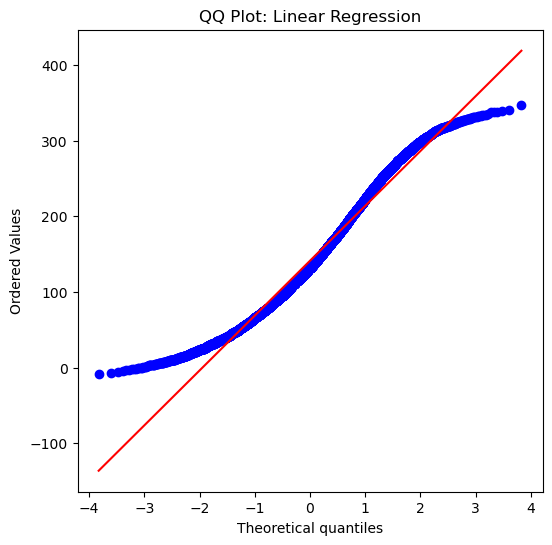

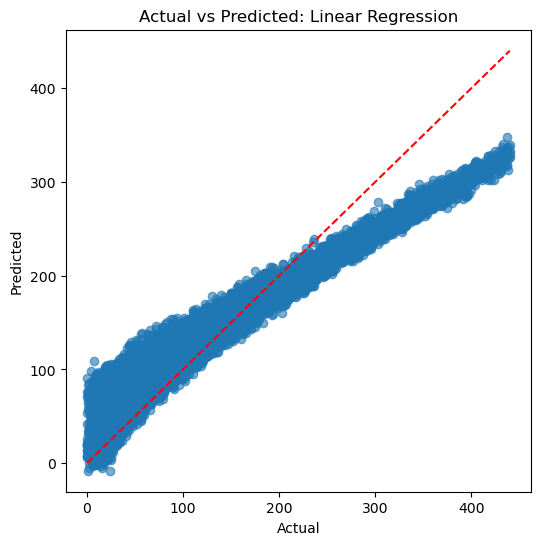

In [93]:
# Train and evaluate Linear Regression
lin_model = LinearRegressionManual(learning_rate=0.01, epochs=1000)
lin_model.fit(X_train, y_train)

# Evaluate and plot results
evaluate_model(lin_model, X_test, y_test, "Linear Regression")


## Results of Model 2


Model: Bayesian Regression
Mean Absolute Error (MAE): 7.46253
Mean Squared Error (MSE): 74.37914
R² Score: 0.99319


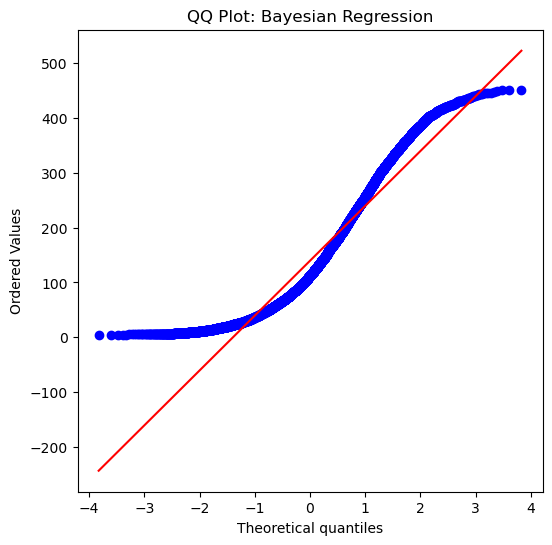

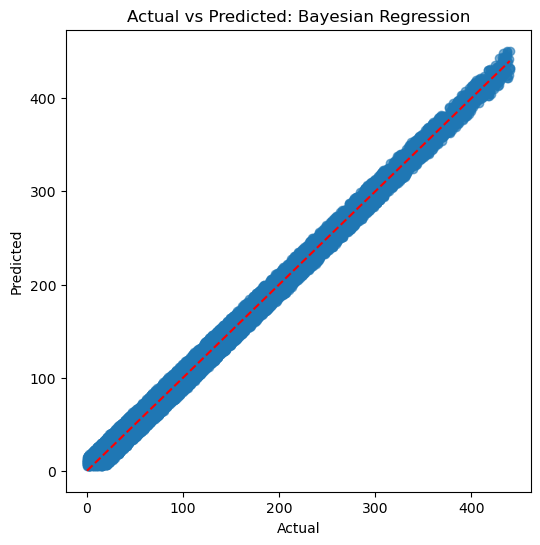

In [95]:
# Train and evaluate Bayesian Regression
bayesian_model = BayesianRegressionManual(lambda_param=1.0)
bayesian_model.fit(X_train, y_train)

# Evaluate and plot results
evaluate_model(bayesian_model, X_test, y_test, "Bayesian Regression")


## Results Of Model 3


Model: Gradient Boosting
Mean Absolute Error (MAE): 7.82499
Mean Squared Error (MSE): 84.57915
R² Score: 0.99226


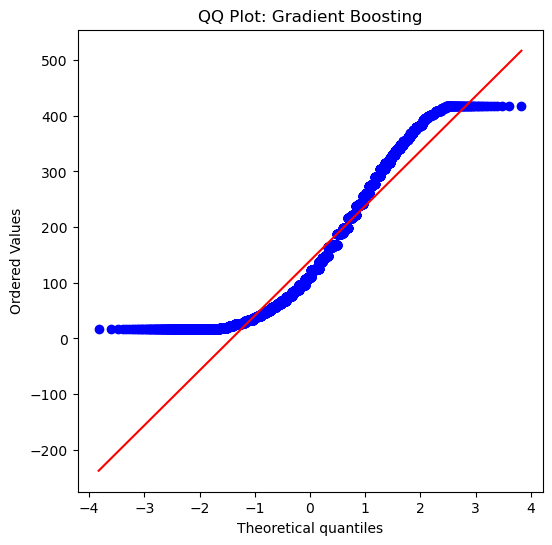

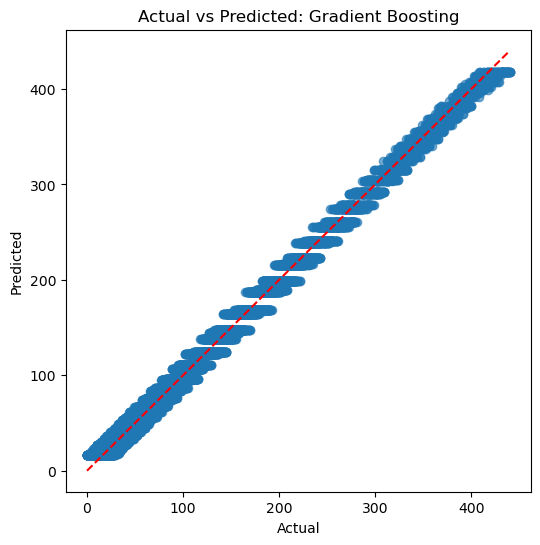

In [97]:
# Train and evaluate Gradient Boosting
gb_model = GradientBoostingManual(n_estimators=100, learning_rate=0.1, max_depth=1)
gb_model.fit(X_train, y_train)

# Evaluate and plot results
evaluate_model(gb_model, X_test, y_test, "Gradient Boosting")


## Results of Model 4


Model: Random Forest
Mean Absolute Error (MAE): 7.64739
Mean Squared Error (MSE): 79.92322
R² Score: 0.99268


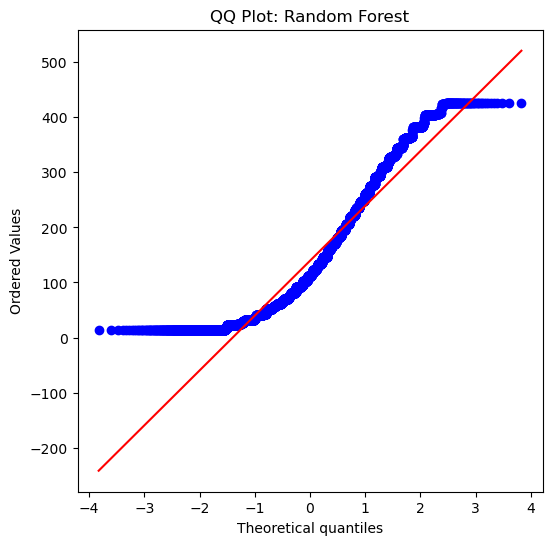

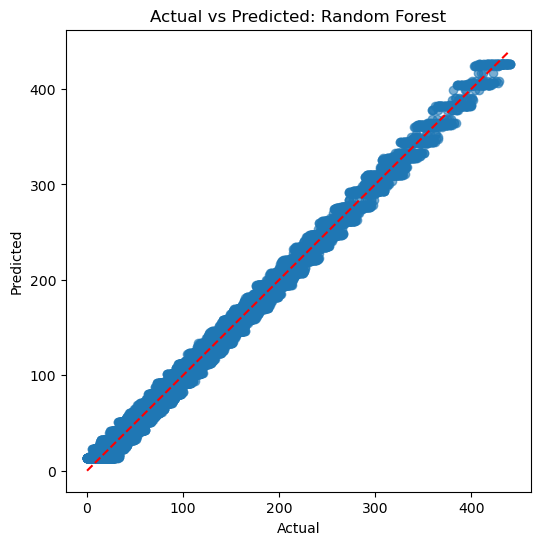

In [99]:
# Train and evaluate Random Forest
rf_model = RandomForestModel(n_estimators=100, max_depth=5)
rf_model.fit(X_train, y_train)

# Evaluate and plot results
evaluate_model(rf_model, X_test, y_test, "Random Forest")
